DOWNLOAD

In [86]:
%reload_ext autoreload
%autoreload 2
%reload_ext watermark
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import xarray as xr
import intake
import regionmask

from matplotlib import rcParams

import cartopy.crs as ccrs
from carbonplan import styles  # noqa: F401

import warnings

regionmask.__version__
warnings.filterwarnings("ignore")

# Note: cmip6_downscaling repo requires PYTHON VERSION 3.8 (or greater) and 

from cmip6_downscaling.analysis.analysis import (
    grab_big_city_data,
    load_big_cities,
)

from cmip6_downscaling.analysis.plot import plot_city_data
xr.set_options(keep_attrs=True)

In [87]:
cat = intake.open_esm_datastore(
    "https://cpdataeuwest.blob.core.windows.net/cp-cmip/version1/catalogs/global-downscaled-cmip6.json"
)

In [88]:
# # ------ MIN TEMP SUBSET ------
cat_subset_min = cat.search(
    method="GARD-SV",
    source_id="MRI-ESM2-0",
    experiment_id="ssp245",
    variable_id="tasmin",
    timescale="month"
)
cat_subset_min.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,timescale,variable_id,method,downscaled_daily_data_uri,version
0,ScenarioMIP,MRI,MRI-ESM2-0,ssp245,r1i1p1f1,month,tasmin,GARD-SV,https://cpdataeuwest.blob.core.windows.net/cp-...,v1


In [89]:
# ------ MAX TEMP SUBSET ------
cat_subset_max = cat.search(
    method="GARD-SV",
    source_id="MRI-ESM2-0",
    experiment_id="ssp245",
    variable_id="tasmax",
    timescale="month"
)
cat_subset_max.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,timescale,variable_id,method,downscaled_daily_data_uri,version
0,ScenarioMIP,MRI,MRI-ESM2-0,ssp245,r1i1p1f1,month,tasmax,GARD-SV,https://cpdataeuwest.blob.core.windows.net/cp-...,v1


In [90]:
# ------ PRECIPITATION SUBSET ------
cat_subset_pr = cat.search(
    method="GARD-SV",
    source_id="MRI-ESM2-0",
    experiment_id="ssp245",
    variable_id="pr",
    timescale="month"
)
cat_subset_pr.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,timescale,variable_id,method,downscaled_daily_data_uri,version
0,ScenarioMIP,MRI,MRI-ESM2-0,ssp245,r1i1p1f1,month,pr,GARD-SV,https://cpdataeuwest.blob.core.windows.net/cp-...,v1


In [91]:
dsets_min = cat_subset_min.to_dataset_dict()
dsets_min

{'ScenarioMIP.MRI.MRI-ESM2-0.ssp245.month.GARD-SV': <xarray.Dataset>
 Dimensions:    (lat: 721, lon: 1440, member_id: 1, time: 1020)
 Coordinates:
   * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
   * lon        (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
   * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2099-12-01
   * member_id  (member_id) object 'r1i1p1f1'
 Data variables:
     tasmin     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1020, 48, 48), meta=np.ndarray>
 Attributes: (12/30)
     Conventions:                                 CF-1.8
     activity_id:                                 ScenarioMIP
     cmip6_downscaling_contact:                   hello@carbonplan.org
     cmip6_downscaling_explainer:                 https://carbonplan.org/resea...
     cmip6_downscaling_institution:               CarbonPlan
     cmip6_downscaling_license:                   CC-BY-4.0
     ...                      

In [92]:
dsets_max = cat_subset_max.to_dataset_dict()
dsets_max


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.timescale.method'


{'ScenarioMIP.MRI.MRI-ESM2-0.ssp245.month.GARD-SV': <xarray.Dataset>
 Dimensions:    (lat: 721, lon: 1440, member_id: 1, time: 1020)
 Coordinates:
   * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
   * lon        (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
   * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2099-12-01
   * member_id  (member_id) object 'r1i1p1f1'
 Data variables:
     tasmax     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1020, 48, 48), meta=np.ndarray>
 Attributes: (12/30)
     Conventions:                                 CF-1.8
     activity_id:                                 ScenarioMIP
     cmip6_downscaling_contact:                   hello@carbonplan.org
     cmip6_downscaling_explainer:                 https://carbonplan.org/resea...
     cmip6_downscaling_institution:               CarbonPlan
     cmip6_downscaling_license:                   CC-BY-4.0
     ...                      

In [93]:
dsets_pr = cat_subset_pr.to_dataset_dict()
dsets_pr

{'ScenarioMIP.MRI.MRI-ESM2-0.ssp245.month.GARD-SV': <xarray.Dataset>
 Dimensions:    (lat: 721, lon: 1440, member_id: 1, time: 1020)
 Coordinates:
   * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
   * lon        (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
   * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2099-12-01
   * member_id  (member_id) object 'r1i1p1f1'
 Data variables:
     pr         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1020, 48, 48), meta=np.ndarray>
 Attributes: (12/30)
     Conventions:                                 CF-1.8
     activity_id:                                 ScenarioMIP
     cmip6_downscaling_contact:                   hello@carbonplan.org
     cmip6_downscaling_explainer:                 https://carbonplan.org/resea...
     cmip6_downscaling_institution:               CarbonPlan
     cmip6_downscaling_license:                   CC-BY-4.0
     ...                      

In [94]:
ds_min = dsets_min["ScenarioMIP.MRI.MRI-ESM2-0.ssp245.month.GARD-SV"]
ds_min

<xarray.Dataset>
Dimensions:    (lat: 721, lon: 1440, member_id: 1, time: 1020)
Coordinates:
  * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon        (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    tasmin     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1020, 48, 48), meta=np.ndarray>
Attributes: (12/30)
    Conventions:                                 CF-1.8
    activity_id:                                 ScenarioMIP
    cmip6_downscaling_contact:                   hello@carbonplan.org
    cmip6_downscaling_explainer:                 https://carbonplan.org/resea...
    cmip6_downscaling_institution:               CarbonPlan
    cmip6_downscaling_license:                   CC-BY-4.0
    ...                                          ...
    intake_esm_attrs:variable_id:                tasmin
    intake_esm_attrs:method:                     GARD-SV
    intake_esm_attrs:downscaled_daily_data_uri:  https://cpdataeuwest.blob.co...
    intake_esm_attrs:version:                    v1
    intake_esm_attrs:_data_format_:              zarr
    intake_esm_dataset_key:                      ScenarioMIP.MRI.MRI-ESM2-0.s...

In [95]:
ds_max = dsets_max["ScenarioMIP.MRI.MRI-ESM2-0.ssp245.month.GARD-SV"]
ds_max

<xarray.Dataset>
Dimensions:    (lat: 721, lon: 1440, member_id: 1, time: 1020)
Coordinates:
  * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon        (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    tasmax     (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1020, 48, 48), meta=np.ndarray>
Attributes: (12/30)
    Conventions:                                 CF-1.8
    activity_id:                                 ScenarioMIP
    cmip6_downscaling_contact:                   hello@carbonplan.org
    cmip6_downscaling_explainer:                 https://carbonplan.org/resea...
    cmip6_downscaling_institution:               CarbonPlan
    cmip6_downscaling_license:                   CC-BY-4.0
    ...                                          ...
    intake_esm_attrs:variable_id:                tasmax
    intake_esm_attrs:method:                     GARD-SV
    intake_esm_attrs:downscaled_daily_data_uri:  https://cpdataeuwest.blob.co...
    intake_esm_attrs:version:                    v1
    intake_esm_attrs:_data_format_:              zarr
    intake_esm_dataset_key:                      ScenarioMIP.MRI.MRI-ESM2-0.s...

In [96]:
ds_pr = dsets_pr["ScenarioMIP.MRI.MRI-ESM2-0.ssp245.month.GARD-SV"] 
ds_pr

<xarray.Dataset>
Dimensions:    (lat: 721, lon: 1440, member_id: 1, time: 1020)
Coordinates:
  * lat        (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon        (lon) float32 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * time       (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Data variables:
    pr         (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1020, 48, 48), meta=np.ndarray>
Attributes: (12/30)
    Conventions:                                 CF-1.8
    activity_id:                                 ScenarioMIP
    cmip6_downscaling_contact:                   hello@carbonplan.org
    cmip6_downscaling_explainer:                 https://carbonplan.org/resea...
    cmip6_downscaling_institution:               CarbonPlan
    cmip6_downscaling_license:                   CC-BY-4.0
    ...                                          ...
    intake_esm_attrs:variable_id:                pr
    intake_esm_attrs:method:                     GARD-SV
    intake_esm_attrs:downscaled_daily_data_uri:  https://cpdataeuwest.blob.co...
    intake_esm_attrs:version:                    v1
    intake_esm_attrs:_data_format_:              zarr
    intake_esm_dataset_key:                      ScenarioMIP.MRI.MRI-ESM2-0.s...

In [97]:
ds_min -= 273.15
ds_max -= 273.15

In [98]:
land = regionmask.defined_regions.natural_earth_v5_0_0.land_110
projection = ccrs.PlateCarree()

In [99]:
## --- SET REGION ---
##  India: lat(8,37) , lon(68,97) (Note: it takes around 20 minutes to run for a single year over India)
##  Bihar: lat(24,28), lon(83,89)
##  Madhya Pradesh: lat(21,27), lon(73,83)

# Region
region = {"lat": slice(24,28), "lon": slice(83,89)} 

In [100]:
# DOWNLOAD MIN TEMP
tasmin = ds_min.tasmin.sel(time=slice("2020-1-1", "2099")).sel(**region).load() #xarray dataarray

In [101]:
tasmin

<xarray.DataArray 'tasmin' (member_id: 1, time: 960, lat: 17, lon: 25)>
array([[[[ 12.01,  10.35,   9.86, ...,  11.63,  11.9 ,  11.79],
         [ 10.71,  10.21,   9.95, ...,  11.86,  11.79,  11.46],
         [ 10.85,  10.57,  10.78, ...,  11.79,  11.66,  11.09],
         ...,
         [  9.42,   9.6 ,   9.72, ...,  -1.3 ,  -8.65, -14.52],
         [  8.87,   8.79,   8.05, ..., -10.19, -14.87, -19.88],
         [  6.62,   5.66,   4.68, ..., -17.33, -18.65, -22.35]],

        [[ 13.04,  11.76,  11.22, ...,  13.58,  13.77,  13.63],
         [ 11.95,  11.69,  11.35, ...,  13.73,  13.61,  13.28],
         [ 11.85,  11.72,  11.94, ...,  13.64,  13.48,  12.93],
         ...,
         [ 10.13,  10.24,  10.2 , ...,  -1.05,  -7.9 , -13.41],
         [  9.25,   9.04,   8.35, ..., -10.29, -14.7 , -19.43],
         [  6.85,   5.87,   4.88, ..., -17.53, -18.87, -22.53]],

        [[ 18.93,  17.95,  17.64, ...,  20.59,  20.58,  20.43],
         [ 18.18,  18.03,  17.87, ...,  20.46,  20.22,  19.99],
         [ 18.29,  18.31,  18.4 , ...,  20.22,  19.97,  19.58],
         ...,
...
         [ 20.8 ,  20.67,  20.29, ...,   7.59,   3.1 ,  -0.7 ],
         [ 18.89,  18.12,  17.36, ...,  -0.21,  -2.29,  -4.7 ],
         [ 15.1 ,  13.96,  13.4 , ...,  -5.57,  -5.77,  -6.48]],

        [[ 15.5 ,  14.37,  13.77, ...,  18.53,  18.77,  18.73],
         [ 14.44,  14.14,  13.69, ...,  18.55,  18.55,  18.41],
         [ 14.11,  13.91,  14.03, ...,  18.39,  18.37,  18.1 ],
         ...,
         [ 14.38,  14.58,  14.5 , ...,   4.86,  -1.41,  -6.09],
         [ 13.38,  13.12,  12.56, ...,  -3.33,  -6.91, -10.54],
         [ 10.71,   9.88,   9.28, ...,  -9.72, -10.54, -12.55]],

        [[ 13.33,  11.67,  11.15, ...,  13.44,  13.7 ,  13.61],
         [ 12.13,  11.62,  11.35, ...,  13.68,  13.59,  13.33],
         [ 12.34,  12.08,  12.2 , ...,  13.55,  13.44,  12.99],
         ...,
         [ 10.25,  10.17,  10.25, ...,   0.51,  -6.48, -11.99],
         [  9.78,   9.52,   8.87, ...,  -8.06, -12.45, -17.04],
         [  7.65,   6.67,   6.01, ..., -14.67, -16.11, -19.41]]]],
      dtype=float32)
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: minimum
    comment:        minimum near-surface (usually, 2 meter) air temperature (...
    long_name:      Daily Minimum Near-Surface Air Temperature
    original_name:  TA
    standard_name:  air_temperature
    units:          K

In [102]:
# SAVE MIN TEMP DATA AS NETCDF
path="/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Min_Temp_2020-2099.nc"
tasmin.to_netcdf(path, mode='w', format="NETCDF4", group=None, engine="netcdf4", encoding=None, unlimited_dims=None, compute=True, invalid_netcdf=False)

In [103]:
# DOWNLOAD MAX TEMP
tasmax = ds_max.tasmax.sel(time=slice("2020", "2099")).sel(**region).load() #xarray dataarray

In [104]:
tasmax

<xarray.DataArray 'tasmax' (member_id: 1, time: 960, lat: 17, lon: 25)>
array([[[[ 23.52,  23.5 ,  23.51, ...,  24.31,  24.09,  24.  ],
         [ 23.81,  23.81,  23.79, ...,  23.95,  23.9 ,  23.9 ],
         [ 23.54,  23.51,  23.31, ...,  23.63,  23.73,  23.76],
         ...,
         [ 22.3 ,  21.74,  21.51, ...,   3.83,  -1.13,  -4.45],
         [ 20.74,  19.71,  19.02, ...,  -6.01,  -8.17,  -8.97],
         [ 16.76,  15.65,  15.61, ..., -11.68, -12.28, -10.81]],

        [[ 25.33,  25.53,  25.57, ...,  27.18,  26.93,  26.81],
         [ 25.91,  26.05,  26.06, ...,  26.92,  26.85,  26.83],
         [ 25.82,  25.95,  25.79, ...,  26.75,  26.83,  26.82],
         ...,
         [ 24.18,  23.65,  23.32, ...,   5.48,   0.88,  -2.42],
         [ 21.85,  20.76,  20.09, ...,  -4.92,  -6.87,  -7.55],
         [ 17.45,  16.28,  16.17, ..., -11.12, -11.68, -10.09]],

        [[ 30.46,  30.69,  30.83, ...,  32.19,  31.8 ,  31.56],
         [ 31.19,  31.24,  31.32, ...,  31.92,  31.75,  31.66],
         [ 31.13,  31.17,  31.02, ...,  31.77,  31.76,  31.68],
         ...,
...
         [ 31.81,  31.41,  30.97, ...,  13.39,   9.83,   7.49],
         [ 29.47,  28.34,  27.56, ...,   5.07,   4.22,   4.22],
         [ 24.66,  23.32,  23.08, ...,   0.67,   1.07,   3.23]],

        [[ 27.15,  27.39,  27.37, ...,  29.9 ,  29.8 ,  29.73],
         [ 27.57,  27.58,  27.52, ...,  29.79,  29.89,  29.95],
         [ 27.01,  26.85,  26.64, ...,  29.82,  30.06,  30.1 ],
         ...,
         [ 28.24,  27.9 ,  27.61, ...,  10.62,   6.07,   3.47],
         [ 25.89,  24.93,  24.26, ...,   2.2 ,   0.47,  -0.1 ],
         [ 21.32,  20.2 ,  20.09, ...,  -2.78,  -2.95,  -1.46]],

        [[ 24.16,  24.11,  24.14, ...,  25.25,  25.03,  24.97],
         [ 24.48,  24.47,  24.47, ...,  25.1 ,  25.08,  25.12],
         [ 24.29,  24.24,  24.04, ...,  25.08,  25.26,  25.33],
         ...,
         [ 23.41,  22.81,  22.65, ...,   6.39,   1.63,  -1.6 ],
         [ 22.12,  21.19,  20.57, ...,  -2.91,  -4.91,  -5.66],
         [ 18.29,  17.33,  17.35, ...,  -8.12,  -8.69,  -7.22]]]],
      dtype=float32)
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: maximum
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    long_name:      Daily Maximum Near-Surface Air Temperature
    original_name:  TA
    standard_name:  air_temperature
    units:          K

In [105]:
# SAVE MAX TEMP DATA AS NETCDF
path="/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Max_Temp_2020-2099.nc"
tasmax.to_netcdf(path, mode='w', format="NETCDF4", group=None, engine="netcdf4", encoding=None, unlimited_dims=None, compute=True, invalid_netcdf=False)

In [106]:
# # DOWNLOAD PRECIPITATION
precip = ds_pr.pr.sel(time=slice("2020", "2099")).sel(**region).load() #xarray dataarray

In [107]:
# SAVE PRECIPITATION DATA AS NETCDF
path="/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Precip_2020-2099.nc"
precip.to_netcdf(path, mode='w', format="NETCDF4", group=None, engine="netcdf4", encoding=None, unlimited_dims=None, compute=True, invalid_netcdf=False)

CLIP

In [108]:
# IMPORT LIBRARIES
import os, sys 
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import datetime
from osgeo import gdal

%matplotlib inline

In [109]:
# FETCH NETCDF FILES
f_min = "/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Min_Temp_2020-2099.nc"
f_max = "/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Max_Temp_2020-2099.nc"
f_pr = "/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Precip_2020-2099.nc"

rec_min = Dataset("/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Min_Temp_2020-2099.nc")
rec_max = Dataset("/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Max_Temp_2020-2099.nc")
rec_pr = Dataset("/Users/revatishelat/Documents/DownIES/Data/Bihar/Rectangular/Rec_Monthly_Precip_2020-2099.nc")

In [110]:
print("\n-----Minimum Temperature-----\n")
tmin = rec_min.variables['tasmin']
print(tmin)


-----Minimum Temperature-----

<class 'netCDF4._netCDF4.Variable'>
float32 tasmin(member_id, time, lat, lon)
    _FillValue: nan
    cell_measures: area: areacella
    cell_methods: area: mean time: minimum
    comment: minimum near-surface (usually, 2 meter) air temperature (add cell_method attribute 'time: min')
    long_name: Daily Minimum Near-Surface Air Temperature
    original_name: TA
    standard_name: air_temperature
    units: K
unlimited dimensions: 
current shape = (1, 960, 17, 25)
filling on


In [111]:
print("\n-----Maximum Temperature-----\n")
tmax = rec_max.variables['tasmax']
print(tmax)


-----Maximum Temperature-----

<class 'netCDF4._netCDF4.Variable'>
float32 tasmax(member_id, time, lat, lon)
    _FillValue: nan
    cell_measures: area: areacella
    cell_methods: area: mean time: maximum
    comment: maximum near-surface (usually, 2 meter) air temperature (add cell_method attribute 'time: max')
    long_name: Daily Maximum Near-Surface Air Temperature
    original_name: TA
    standard_name: air_temperature
    units: K
unlimited dimensions: 
current shape = (1, 960, 17, 25)
filling on


In [112]:
print("\n-----Precipitation-----\n")
tpr = rec_pr.variables['pr']
print(tpr)


-----Precipitation-----

<class 'netCDF4._netCDF4.Variable'>
float32 pr(member_id, time, lat, lon)
    _FillValue: nan
    cell_measures: area: areacella
    cell_methods: area: time: mean
    comment: includes both liquid and solid phases
    long_name: Precipitation
    original_name: PRECIPI
    standard_name: precipitation_flux
    units: mm
unlimited dimensions: 
current shape = (1, 960, 17, 25)
filling on


In [113]:
print("Units\n----------------------------")
unitmin = rec_min.variables['tasmin'].units
print("Temperature: "+unitmin)

unitpr = rec_pr.variables['pr'].units
print("Precipitation: "+unitpr)

unitlat = rec_min.variables['lat'].units
print("Latitude: " +unitlat)

unitlon = rec_min.variables['lon'].units
print("Longitude: " +unitlon)

unitt = rec_min.variables['time'].units
print("Time: "+unitt)

Units
----------------------------
Temperature: K
Precipitation: mm
Latitude: degrees_north
Longitude: degrees_east
Time: days since 2015-01-01


In [114]:
# (ARRAY OF) MINIMUM TEMPERATURE VALUES

tmin = rec_min.variables['tasmin'][0,:,:,:].data #precipitation
print(tmin)
print(len(tmin))

[[[ 12.01  10.35   9.86 ...  11.63  11.9   11.79]
  [ 10.71  10.21   9.95 ...  11.86  11.79  11.46]
  [ 10.85  10.57  10.78 ...  11.79  11.66  11.09]
  ...
  [  9.42   9.6    9.72 ...  -1.3   -8.65 -14.52]
  [  8.87   8.79   8.05 ... -10.19 -14.87 -19.88]
  [  6.62   5.66   4.68 ... -17.33 -18.65 -22.35]]

 [[ 13.04  11.76  11.22 ...  13.58  13.77  13.63]
  [ 11.95  11.69  11.35 ...  13.73  13.61  13.28]
  [ 11.85  11.72  11.94 ...  13.64  13.48  12.93]
  ...
  [ 10.13  10.24  10.2  ...  -1.05  -7.9  -13.41]
  [  9.25   9.04   8.35 ... -10.29 -14.7  -19.43]
  [  6.85   5.87   4.88 ... -17.53 -18.87 -22.53]]

 [[ 18.93  17.95  17.64 ...  20.59  20.58  20.43]
  [ 18.18  18.03  17.87 ...  20.46  20.22  19.99]
  [ 18.29  18.31  18.4  ...  20.22  19.97  19.58]
  ...
  [ 16.81  16.71  16.79 ...   4.91  -1.12  -5.76]
  [ 15.43  14.98  14.24 ...  -3.7   -7.04 -10.59]
  [ 12.21  11.22  10.48 ... -10.4  -11.04 -13.05]]

 ...

 [[ 22.7   22.14  21.77 ...  24.03  24.18  24.12]
  [ 22.3   22.16  21

In [115]:
tmax = rec_max.variables['tasmax'][0:,:,:].data # 0 indicates first time slice
print(tmax)
print(len(tmax))

[[[[ 23.52  23.5   23.51 ...  24.31  24.09  24.  ]
   [ 23.81  23.81  23.79 ...  23.95  23.9   23.9 ]
   [ 23.54  23.51  23.31 ...  23.63  23.73  23.76]
   ...
   [ 22.3   21.74  21.51 ...   3.83  -1.13  -4.45]
   [ 20.74  19.71  19.02 ...  -6.01  -8.17  -8.97]
   [ 16.76  15.65  15.61 ... -11.68 -12.28 -10.81]]

  [[ 25.33  25.53  25.57 ...  27.18  26.93  26.81]
   [ 25.91  26.05  26.06 ...  26.92  26.85  26.83]
   [ 25.82  25.95  25.79 ...  26.75  26.83  26.82]
   ...
   [ 24.18  23.65  23.32 ...   5.48   0.88  -2.42]
   [ 21.85  20.76  20.09 ...  -4.92  -6.87  -7.55]
   [ 17.45  16.28  16.17 ... -11.12 -11.68 -10.09]]

  [[ 30.46  30.69  30.83 ...  32.19  31.8   31.56]
   [ 31.19  31.24  31.32 ...  31.92  31.75  31.66]
   [ 31.13  31.17  31.02 ...  31.77  31.76  31.68]
   ...
   [ 30.18  29.49  29.21 ...  12.51   8.4    5.7 ]
   [ 28.38  27.22  26.36 ...   3.76   2.47   1.95]
   [ 23.65  22.41  22.13 ...  -1.46  -1.29   0.38]]

  ...

  [[ 30.61  31.06  31.06 ...  32.54  32.43  32.2

In [116]:
# (ARRAY OF) MINIMUM TEMPERATURE VALUES

tpr = rec_pr.variables['pr'][0,:,:,:].data #precipitation
print(tpr)
print(len(tpr))

[[[ 18.95  23.91  22.13 ...  42.42  36.17  37.89]
  [ 18.92  20.99  19.77 ...  40.63  36.03  34.55]
  [ 15.41  16.84  18.86 ...  46.76  44.56  43.8 ]
  ...
  [ 36.99  44.7   38.92 ... 510.18 141.99 101.47]
  [ 42.35  56.65  56.38 ... 598.39 187.11  55.68]
  [ 75.68  91.11  73.3  ... 143.88  75.23  22.04]]

 [[  0.     0.     0.   ...  11.97  13.82  18.25]
  [  0.     0.     0.   ...  12.94  14.42  16.66]
  [  0.     0.     0.   ...  14.16  16.3   18.74]
  ...
  [ 19.15  23.33  24.62 ... 561.78 154.33 111.62]
  [ 33.79  51.02  56.89 ... 632.69 205.17  66.04]
  [ 86.41 106.95 100.59 ... 154.29  83.06  27.07]]

 [[ 16.72  19.46  20.99 ...   8.76   6.16   5.5 ]
  [ 19.08  18.57  20.15 ...   9.71   7.89   6.07]
  [ 24.01  25.26  27.55 ...  12.72  11.92   9.79]
  ...
  [ 26.64  22.96  28.85 ... 317.71  67.13  43.32]
  [ 43.6   61.05  67.24 ... 439.45 133.36  35.4 ]
  [109.37 135.44 129.28 ...  97.58  52.76  14.79]]

 ...

 [[157.57 157.36 151.14 ... 244.35 262.04 298.74]
  [168.68 157.59 152

In [117]:
import xarray as xr # for reading netcdf dataset
import numpy as np 
import geopandas as gpd #dealing with shape file
import regionmask 
import pandas as pd 
import cartopy.crs as ccrs #plotting
import matplotlib.pyplot as plt 
import warnings; warnings.filterwarnings(action='ignore')
import time

%matplotlib inline

In [118]:
shapefile = "/Users/revatishelat/Documents/DownIES/India and States shapefiles/bihar.shp"

state = gpd.read_file(shapefile)
state

,dtname,stname,stcode11,dtcode11,year_stat,Shape_Leng,test,Dist_LGD,State_LGD,geometry
0,Pashchim Champaran,BIHAR,10,203,2011_c,545933.789936,0.0,211.0,10.0,"POLYGON ((84.11717 27.51435, 84.11762 27.51366..."


In [119]:
state.geometry

0    POLYGON ((84.11717 27.51435, 84.11762 27.51366...
Name: geometry, dtype: geometry

{'BIHAR'}


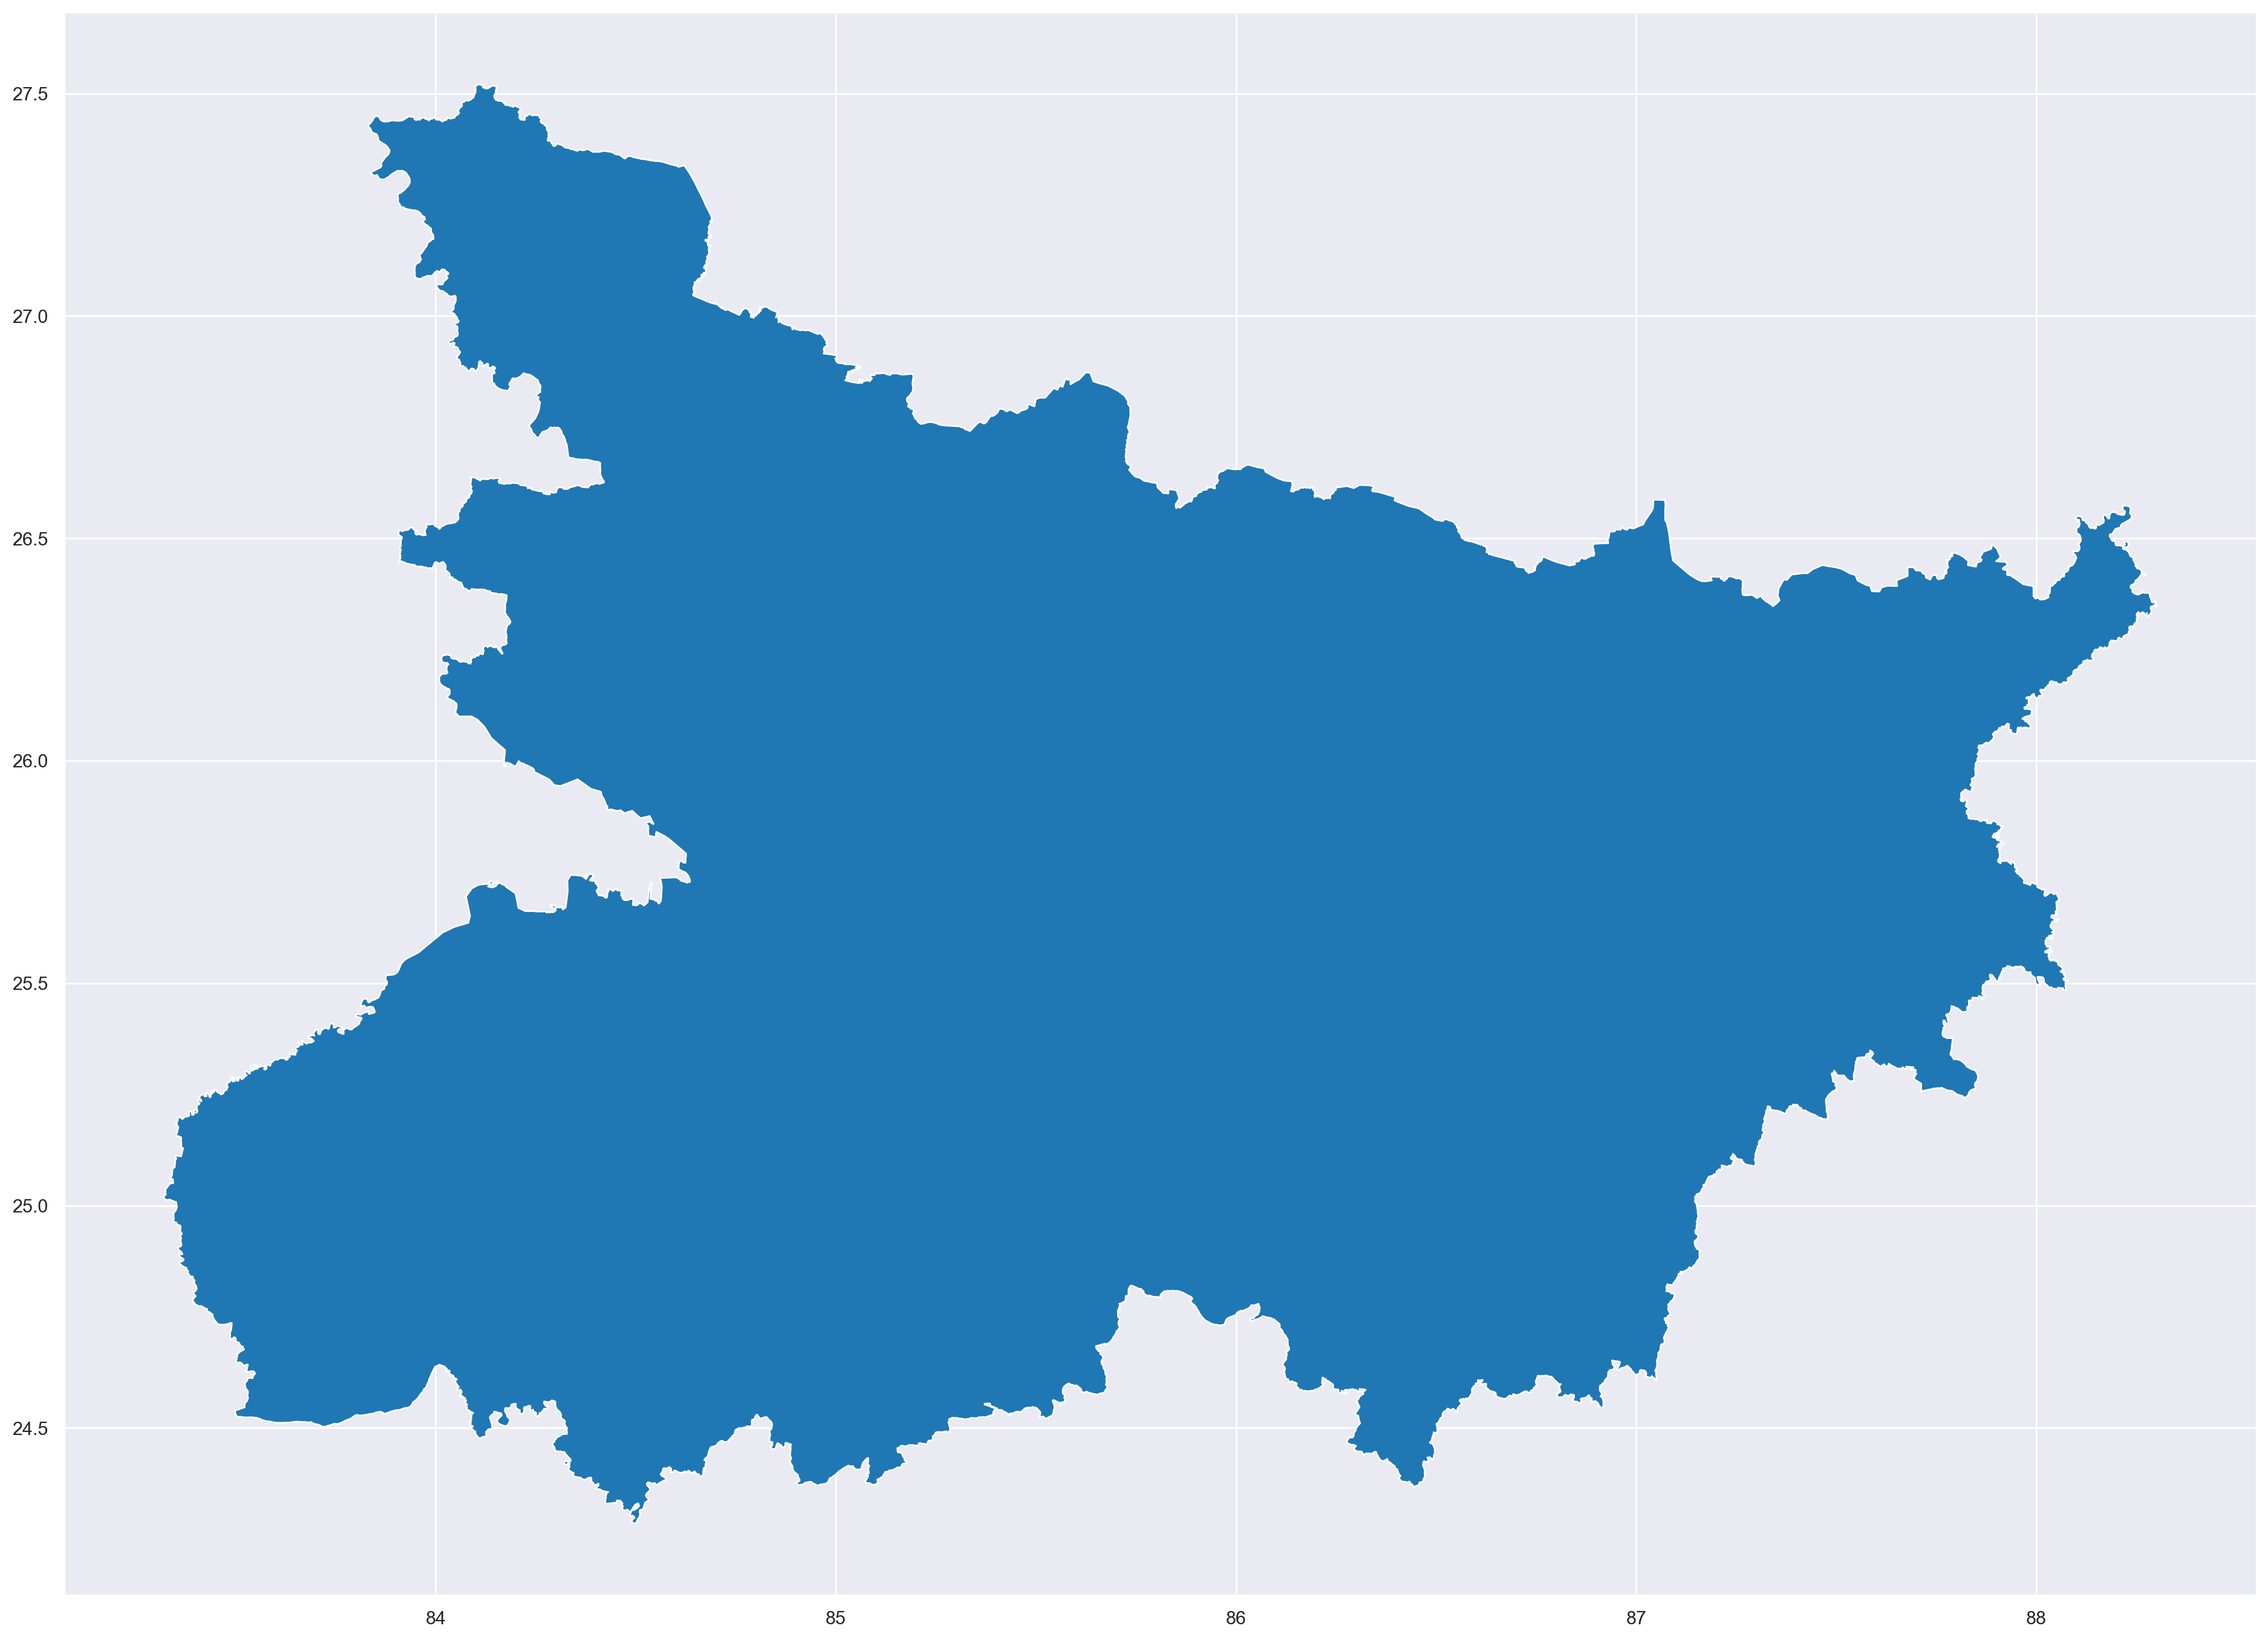

In [120]:
fig, ax = plt.subplots(figsize=(25,17))
state.plot(ax=ax, column = "stname")

my_list = list(state['stname'])
my_list_unique = set(my_list)
indexes = [my_list.index(x) for x in my_list_unique]
print(my_list_unique)

In [121]:
state.geometry

0    POLYGON ((84.11717 27.51435, 84.11762 27.51366...
Name: geometry, dtype: geometry

In [122]:
# CREATE REGION

state_mask_poly = regionmask.Regions(name=state.stname, numbers=indexes, names=state.stname[indexes],outlines=state.geometry)
state_mask_poly

<regionmask.Regions>
Name:     0    BIHAR
Name: stname, dtype: object
overlap:  False

Regions:
0 r0 BIHAR

[1 regions]

In [123]:
print("{}".format(state_mask_poly.names[:]))

['BIHAR']


In [124]:
# READ NETCDF FILE AS XARRAY
a_min = xr.open_dataarray(f_min)
a_min

<xarray.DataArray 'tasmin' (member_id: 1, time: 960, lat: 17, lon: 25)>
[408000 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: minimum
    comment:        minimum near-surface (usually, 2 meter) air temperature (...
    long_name:      Daily Minimum Near-Surface Air Temperature
    original_name:  TA
    standard_name:  air_temperature
    units:          K

In [125]:
a_max  = xr.open_dataarray(f_max)
a_max

<xarray.DataArray 'tasmax' (member_id: 1, time: 960, lat: 17, lon: 25)>
[408000 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: maximum
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    long_name:      Daily Maximum Near-Surface Air Temperature
    original_name:  TA
    standard_name:  air_temperature
    units:          K

In [126]:
a_pr = xr.open_dataarray(f_pr)
a_pr

<xarray.DataArray 'pr' (member_id: 1, time: 960, lat: 17, lon: 25)>
[408000 values with dtype=float32]
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        includes both liquid and solid phases
    long_name:      Precipitation
    original_name:  PRECIPI
    standard_name:  precipitation_flux
    units:          mm

In [127]:
# CREATING MASK

mask = state_mask_poly.mask(a_min.isel(time =0), lat_name='lat', lon_name='lon') #time = 0 => one time slice; this takes only one latitude and longitude #.isel(time =0)
mask

<xarray.DataArray 'mask' (lat: 17, lon: 25)>
array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0., nan, nan, nan,
        nan,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
         0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., nan,  0., nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  0.,  0.,  0.,  0.,  0.,  0., nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan,  0.,  0.,  0., nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan,  0.,  0.,  0., nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])
Coordinates:
  * lat      (lat) float32 24.0 24.25 24.5 24.75 25.0 ... 27.25 27.5 27.75 28.0
    time     datetime64[ns] 2020-01-01
  * lon      (lon) float32 83.0 83.25 83.5 83.75 84.0 ... 88.25 88.5 88.75 89.0

In [128]:
f_mask = "/Users/revatishelat/Documents/DownIES/mask_by_Bihar.nc"
mask.to_netcdf(f_mask)

PermissionError: [Errno 13] Permission denied: b'/Users/revatishelat/Documents/DownIES/mask_by_Bihar.nc'

In [129]:
#Read mask as saved previously

mask1 = xr.open_dataarray(f_mask)
print(mask1)
print(type(mask1))

<xarray.DataArray 'mask' (lat: 17, lon: 25)>
[425 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 24.0 24.25 24.5 24.75 25.0 ... 27.25 27.5 27.75 28.0
    time     datetime64[ns] ...
  * lon      (lon) float32 83.0 83.25 83.5 83.75 84.0 ... 88.25 88.5 88.75 89.0
<class 'xarray.core.dataarray.DataArray'>


In [130]:
masked_shape_min = a_min.where(mask1 == 0)
print(masked_shape_min)

<xarray.DataArray 'tasmin' (member_id: 1, time: 960, lat: 17, lon: 25)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan,

In [131]:
masked_shape_max = a_max.where(mask == 0)
masked_shape_max

<xarray.DataArray 'tasmax' (member_id: 1, time: 960, lat: 17, lon: 25)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: mean time: maximum
    comment:        maximum near-surface (usually, 2 meter) air temperature (...
    long_name:      Daily Maximum Near-Surface Air Temperature
    original_name:  TA
    standard_name:  air_temperature
    units:          K

In [132]:
masked_shape_pr = a_pr.where(mask == 0)
masked_shape_pr

<xarray.DataArray 'pr' (member_id: 1, time: 960, lat: 17, lon: 25)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lat        (lat) float32 24.0 24.25 24.5 24.75 ... 27.25 27.5 27.75 28.0
  * lon        (lon) float32 83.0 83.25 83.5 83.75 ... 88.25 88.5 88.75 89.0
  * time       (time) datetime64[ns] 2020-01-01 2020-02-01 ... 2099-12-01
  * member_id  (member_id) object 'r1i1p1f1'
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        includes both liquid and solid phases
    long_name:      Precipitation
    original_name:  PRECIPI
    standard_name:  precipitation_flux
    units:          mm

<Axes: title={'center': 'time = 2020-01-01, member_id = r1i1p1f1'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

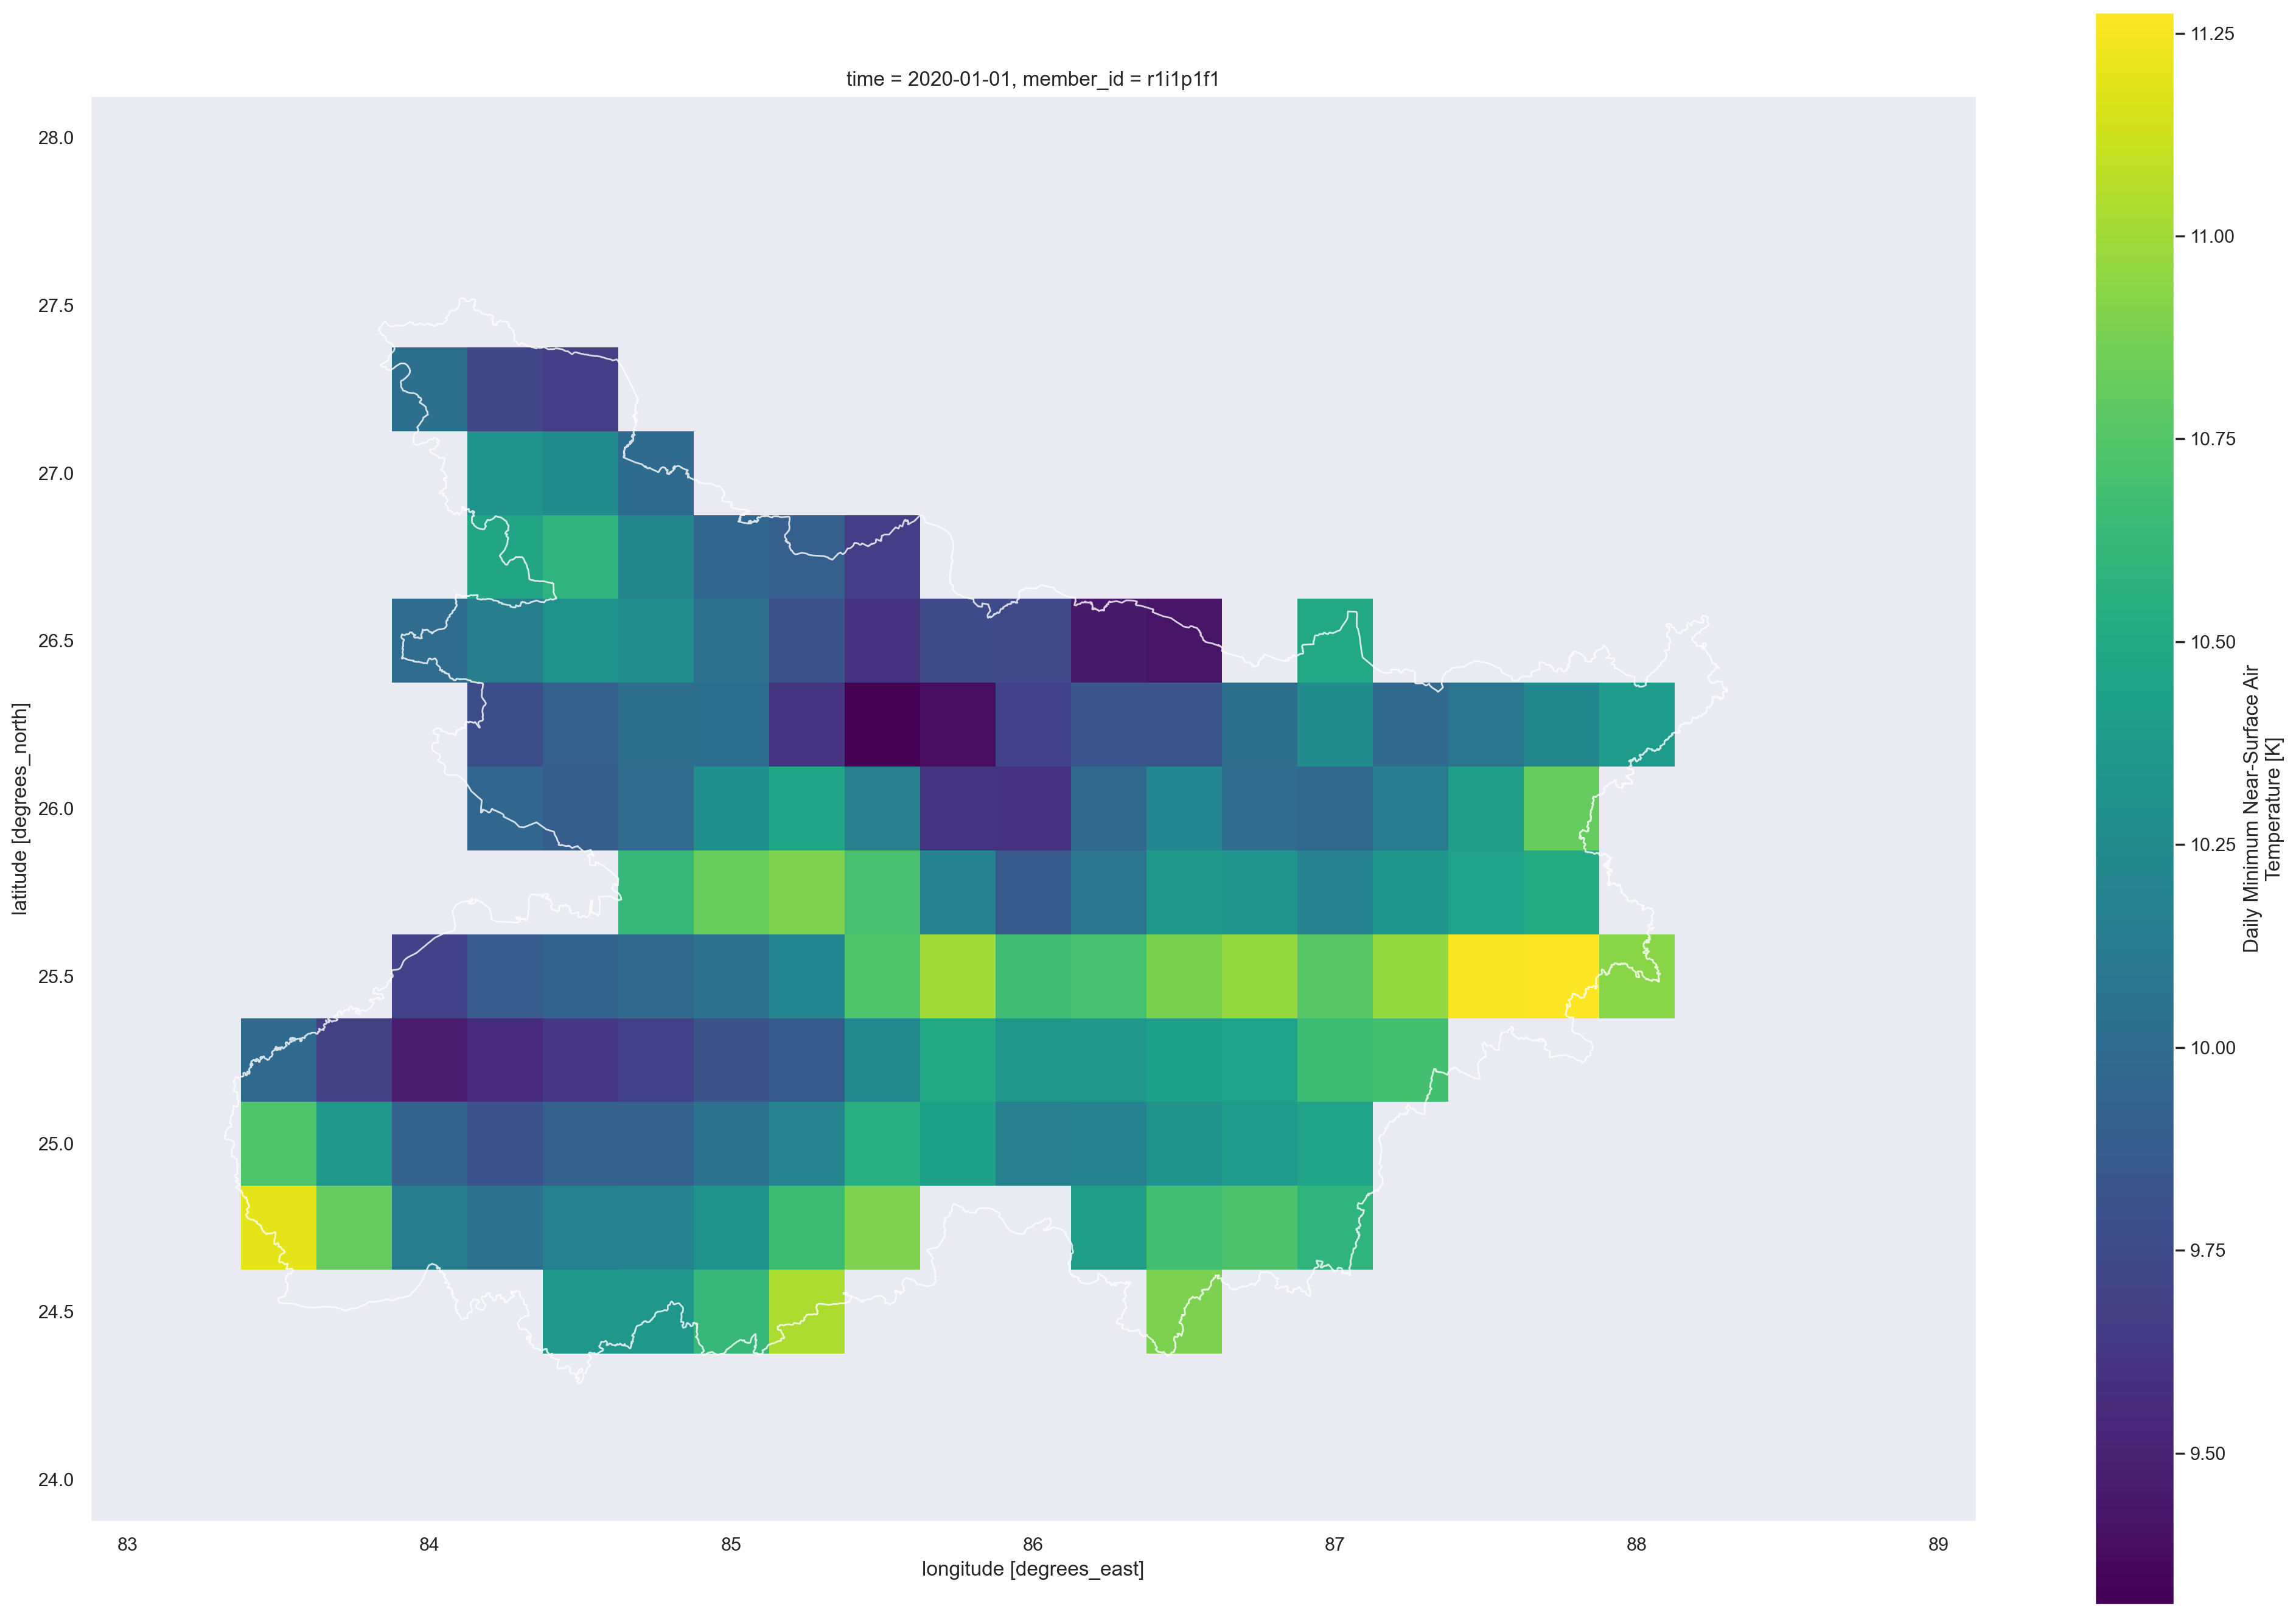

In [133]:
#Plot masked data (one we've obtained above)

plt.figure(figsize=(25, 17))
ax = plt.axes()
masked_shape_min.isel(time=0).plot(ax=ax)
state.plot(ax=ax, alpha = 0.8, facecolor = 'none')

<Axes: title={'center': 'time = 2020-01-01, member_id = r1i1p1f1'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

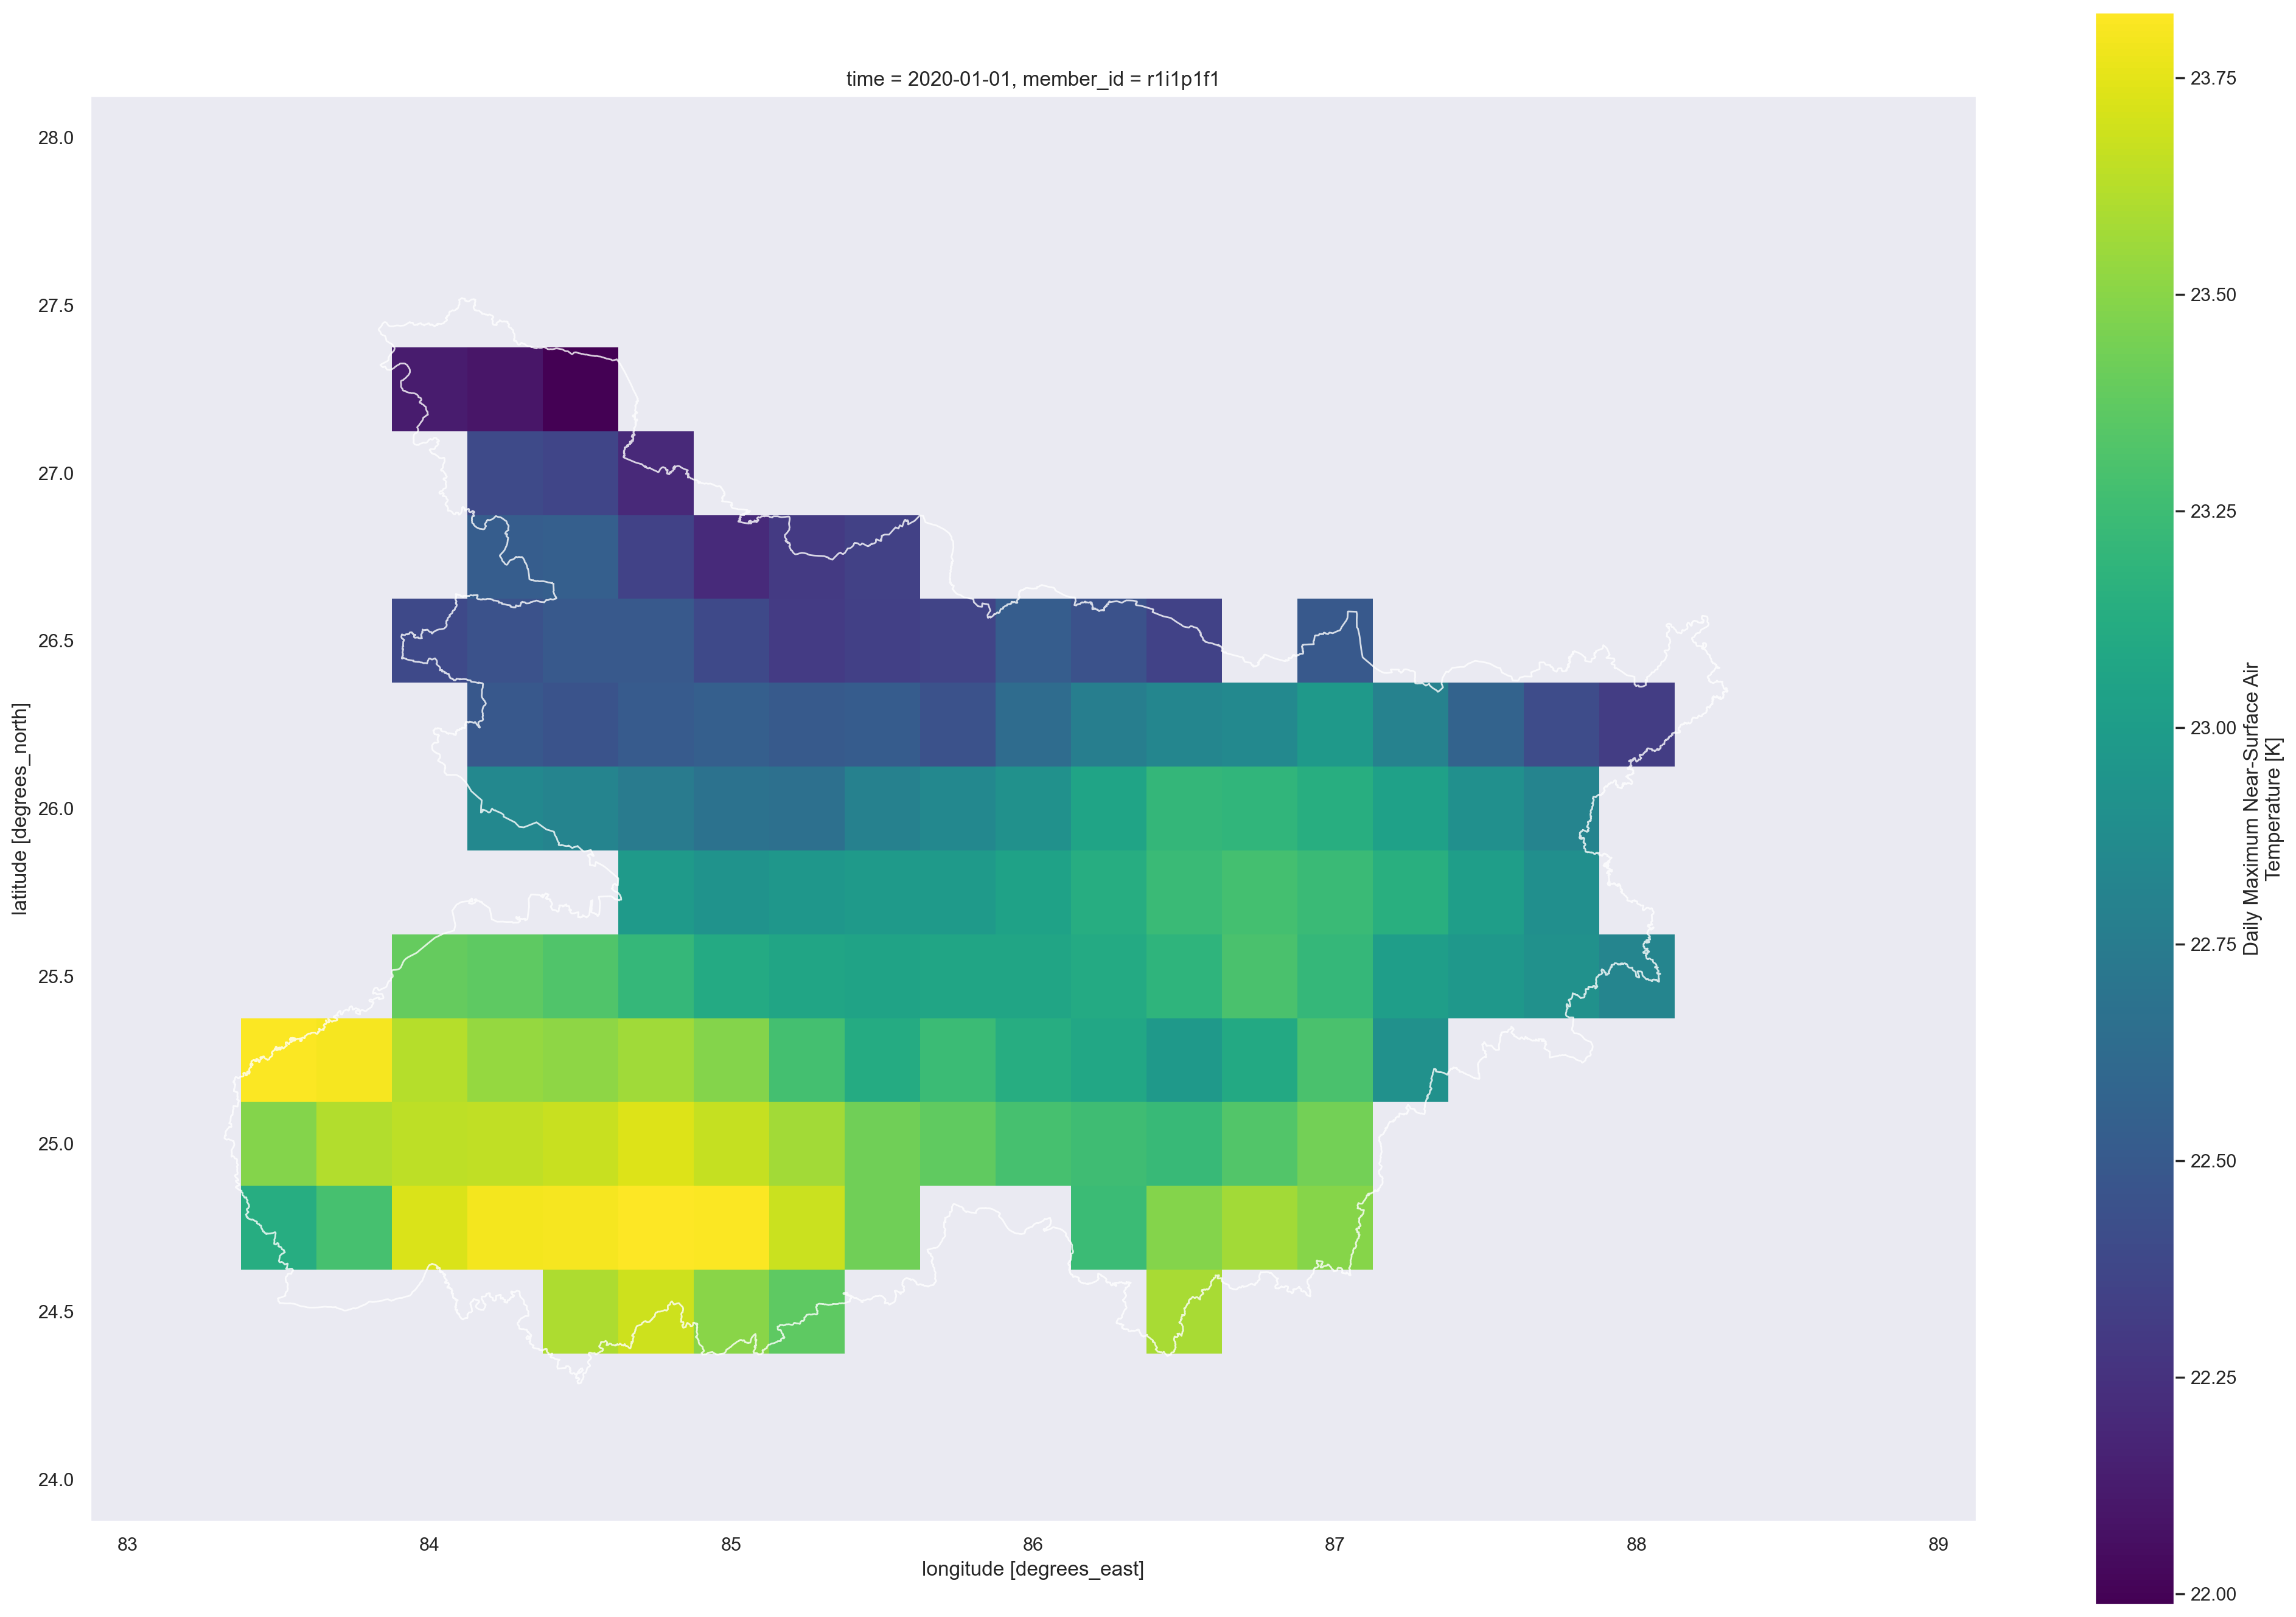

In [134]:
#Plot masked data (one we've obtained above)

plt.figure(figsize=(25, 17))
ax = plt.axes()
masked_shape_max.isel(time=0).plot(ax=ax)
state.plot(ax=ax, alpha = 0.8, facecolor = 'none')

<Axes: title={'center': 'time = 2020-01-01, member_id = r1i1p1f1'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

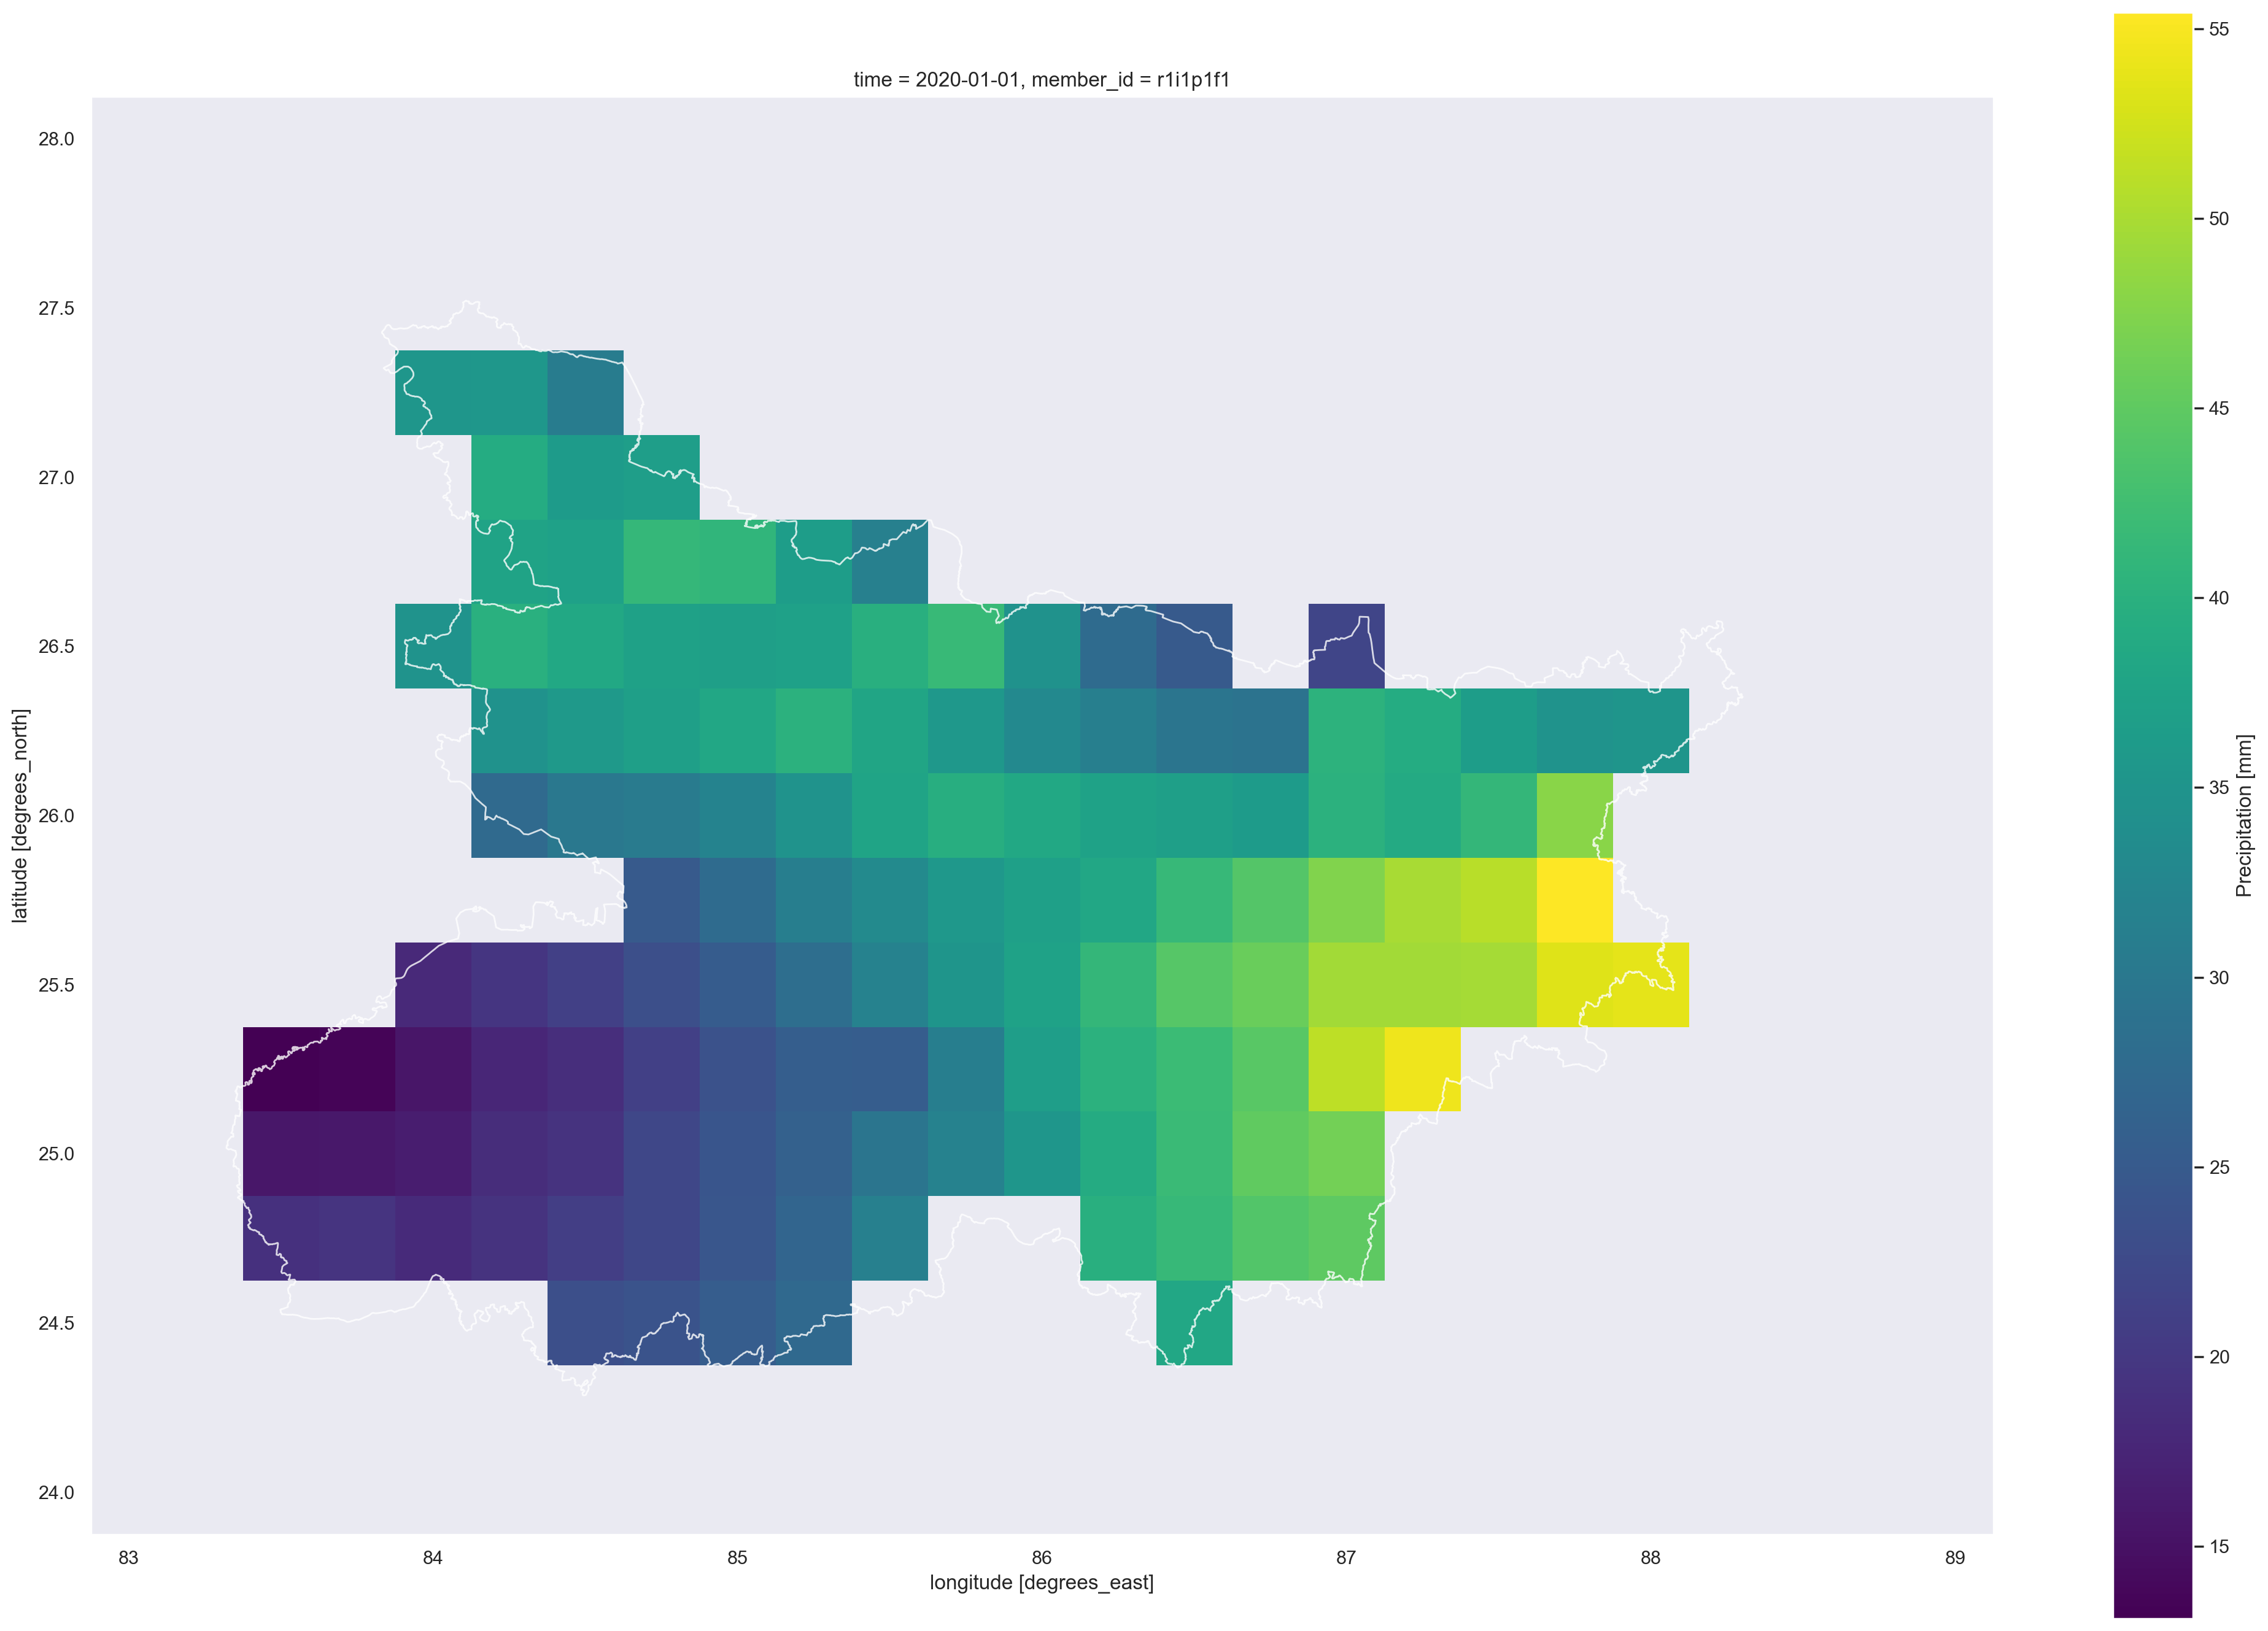

In [135]:
#Plot masked data (one we've obtained above)

plt.figure(figsize=(25, 17))
ax = plt.axes()
masked_shape_pr.isel(time=0).plot(ax=ax)
state.plot(ax=ax, alpha = 0.8, facecolor = 'none')

In [136]:
encoding = {"tasmin": {'zlib':True, "complevel":4}}
masked_shape_min.to_netcdf("/Users/revatishelat/Documents/DownIES/Data/Bihar/Clipped/Clipped_Monthly_Min_Temp_2020-2099.nc", format='NETCDF4',engine='netcdf4',encoding=encoding)

In [137]:
encoding = {"tasmax": {'zlib':True, "complevel":4}}
masked_shape_max.to_netcdf("/Users/revatishelat/Documents/DownIES/Data/Bihar/Clipped/Clipped_Monthly_Max_Temp_2020-2099.nc", format='NETCDF4',engine='netcdf4', encoding=encoding)

In [138]:
encoding = {"pr": {'zlib':True, "complevel":4}}
masked_shape_pr.to_netcdf("/Users/revatishelat/Documents/DownIES/Data/Bihar/Clipped/Clipped_Monthly_Precip_2020-2099.nc", format='NETCDF4',engine='netcdf4', encoding=encoding)

VISUALIZE

In [139]:
# IMPORT LIBRARIES
import netCDF4 as nc
import numpy as np
import scipy as sp
import scipy.stats
import pandas as pd
from pandas import DataFrame
import seaborn as sb
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

In [140]:
## ---- CLIPPED DATA FILES ----
f_tasmin = "/Users/revatishelat/Documents/DownIES/Data/Bihar/Clipped/Clipped_Monthly_Min_Temp_2020-2099.nc"
f_tasmax = "/Users/revatishelat/Documents/DownIES/Data/Bihar/Clipped/Clipped_Monthly_Max_Temp_2020-2099.nc"
f_pr = "/Users/revatishelat/Documents/DownIES/Data/Bihar/Clipped/Clipped_Monthly_Precip_2020-2099.nc"

In [141]:
ds_tasmin = Dataset(f_tasmin)
print(ds_tasmin)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(17), lon(25), time(960), member_id(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int64 time(time), <class 'str'> member_id(member_id), float32 tasmin(member_id, time, lat, lon)
    groups: 


In [142]:
ds_tasmax = Dataset(f_tasmax)
print(ds_tasmax)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(17), lon(25), time(960), member_id(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int64 time(time), <class 'str'> member_id(member_id), float32 tasmax(member_id, time, lat, lon)
    groups: 


In [143]:
ds_pr = Dataset(f_pr)
print(ds_pr)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): lat(17), lon(25), time(960), member_id(1)
    variables(dimensions): float32 lat(lat), float32 lon(lon), int64 time(time), <class 'str'> member_id(member_id), float32 pr(member_id, time, lat, lon)
    groups: 


In [144]:
# Variables
print(ds_tasmin.variables.keys())
print(ds_tasmax.variables.keys())
print(ds_pr.variables.keys())

dict_keys(['lat', 'lon', 'time', 'member_id', 'tasmin'])
dict_keys(['lat', 'lon', 'time', 'member_id', 'tasmax'])
dict_keys(['lat', 'lon', 'time', 'member_id', 'pr'])


In [145]:
no_of_months = ds_tasmin.variables['time'].size
no_of_months

960

In [146]:
years = list(range(2020,2100))
print(len(years))
print(years)

80
[2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099]


In [147]:
# Monthly Minimum Temperature Averages
means_min = []
for i in range(0,no_of_months):
        a = ds_tasmin['tasmin'][0,i].data
        a = a[np.logical_not(np.isnan(a))]
        j = np.ndarray.mean(a)
        means_min.append(j)
print(means_min)

[10.220653, 11.791436, 18.991255, 20.85846, 25.235712, 26.459408, 25.499697, 24.214348, 23.790968, 20.106472, 14.021004, 9.901049, 9.308543, 12.098492, 17.591413, 22.554142, 25.789934, 26.445477, 24.986673, 25.05129, 24.532328, 21.156595, 15.64628, 12.010493, 11.141817, 12.51942, 16.32102, 19.78207, 23.271816, 24.908789, 25.87242, 24.72153, 23.991507, 20.615702, 15.962716, 13.401739, 11.459198, 15.26756, 18.75797, 25.050901, 24.420975, 26.825953, 25.26586, 24.895897, 24.189127, 19.311016, 15.674936, 11.64569, 10.187938, 12.0656595, 15.731533, 19.981445, 25.588963, 26.96304, 26.39594, 25.266666, 24.620514, 21.049746, 16.797384, 12.074017, 10.150495, 12.150352, 19.891283, 22.824165, 25.42616, 25.7559, 25.26929, 25.068005, 23.756796, 20.138563, 14.883218, 9.931913, 11.815541, 13.069857, 19.90125, 21.870504, 25.675938, 27.372355, 26.346891, 25.255392, 24.645815, 20.624466, 17.524557, 10.877063, 10.287412, 16.4001, 18.696974, 23.872038, 26.410309, 26.599522, 26.080784, 24.947554, 23.72026, 

In [148]:
# Monthly Maximum Temperature Averages
means_max = []
for i in range(0,no_of_months):
        a = ds_tasmax['tasmax'][0,i].data
        a = a[np.logical_not(np.isnan(a))]
        j = np.ndarray.mean(a)
        means_max.append(j)
print(means_max)

[23.018988, 26.191475, 31.755972, 31.487364, 36.023666, 39.01745, 33.57774, 30.94317, 30.794579, 29.568092, 26.526217, 22.293575, 22.200861, 26.986547, 30.335833, 33.34958, 37.646343, 37.995327, 32.005424, 31.779669, 31.826628, 30.399086, 26.688713, 22.416492, 21.361198, 23.96632, 29.05631, 30.951548, 32.52146, 33.237225, 34.195023, 31.154629, 31.677786, 30.295935, 28.698795, 25.753176, 24.720816, 28.119982, 31.031883, 35.04845, 35.26131, 38.272438, 31.949568, 31.145187, 31.356157, 30.27376, 27.526144, 24.026184, 24.077963, 26.61702, 29.380226, 30.519793, 36.80718, 38.951477, 36.23071, 32.51846, 32.598255, 31.265276, 29.317993, 25.304508, 24.643904, 26.892656, 32.591606, 33.901127, 37.758774, 35.62154, 32.495037, 31.615614, 31.703825, 30.415651, 27.849337, 23.299969, 24.772303, 27.05686, 31.552067, 33.18707, 37.562065, 40.65299, 35.857132, 32.22197, 31.66864, 30.329441, 29.354467, 22.489603, 22.473526, 29.424389, 31.409428, 34.32302, 38.9067, 37.520027, 35.981377, 31.434914, 31.025085,

In [149]:
# Monthly Precipitation Averages
means_pr = []
for i in range(0,no_of_months):
        a = ds_pr['pr'][0,i].data
        a = a[np.logical_not(np.isnan(a))]
        j = np.ndarray.mean(a)
        means_pr.append(j)
print(means_pr)

[33.772205, 9.334978, 29.673115, 121.21813, 8.234151, 66.04231, 258.1345, 339.407, 251.56903, 63.9964, 1.0710924, 18.99939, 19.701725, 0.42119497, 73.76102, 30.257591, 26.680855, 78.42138, 372.4391, 451.3505, 203.63257, 73.27962, 79.89058, 144.19208, 221.79073, 115.71636, 9.126595, 99.97976, 197.8901, 194.65936, 185.53836, 426.48145, 164.36632, 36.025486, 6.7207527, 11.97324, 13.769257, 16.899149, 31.574852, 28.537842, 93.12901, 124.68953, 447.49142, 428.76855, 219.1495, 7.72439, 9.0706005, 20.590572, 2.6156297, 12.241254, 47.88842, 148.58684, 15.201698, 72.09273, 109.64205, 219.88574, 166.8036, 42.34809, 19.472347, 6.9311166, 28.7529, 22.602816, 5.0329666, 37.33934, 33.3069, 195.64388, 327.0945, 433.59467, 117.44645, 99.56722, 1.4283549, 0.18865536, 18.584717, 7.7096076, 92.72696, 17.16415, 21.89636, 17.590157, 116.76278, 375.54315, 330.22662, 69.108795, 1.2211429, 45.52467, 58.42656, 15.89784, 76.704994, 31.084337, 2.8466468, 116.80246, 188.71362, 371.30817, 360.5847, 13.232926, 44.0

In [150]:
print(len(means_min))
print(len(means_max))
print(len(means_pr))

960
960
960


In [151]:
# Divide data into sublists of years
def divide_chunks(l, n):
     
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
# How many elements each list should have
n = 12

x_min = list(divide_chunks(means_min, n))
print (x_min)

[[10.220653, 11.791436, 18.991255, 20.85846, 25.235712, 26.459408, 25.499697, 24.214348, 23.790968, 20.106472, 14.021004, 9.901049], [9.308543, 12.098492, 17.591413, 22.554142, 25.789934, 26.445477, 24.986673, 25.05129, 24.532328, 21.156595, 15.64628, 12.010493], [11.141817, 12.51942, 16.32102, 19.78207, 23.271816, 24.908789, 25.87242, 24.72153, 23.991507, 20.615702, 15.962716, 13.401739], [11.459198, 15.26756, 18.75797, 25.050901, 24.420975, 26.825953, 25.26586, 24.895897, 24.189127, 19.311016, 15.674936, 11.64569], [10.187938, 12.0656595, 15.731533, 19.981445, 25.588963, 26.96304, 26.39594, 25.266666, 24.620514, 21.049746, 16.797384, 12.074017], [10.150495, 12.150352, 19.891283, 22.824165, 25.42616, 25.7559, 25.26929, 25.068005, 23.756796, 20.138563, 14.883218, 9.931913], [11.815541, 13.069857, 19.90125, 21.870504, 25.675938, 27.372355, 26.346891, 25.255392, 24.645815, 20.624466, 17.524557, 10.877063], [10.287412, 16.4001, 18.696974, 23.872038, 26.410309, 26.599522, 26.080784, 24.947

In [152]:
# Divide data into sublists of years
def divide_chunks(l, n):
     
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
# How many elements each list should have
n = 12

x_max = list(divide_chunks(means_max, n))
print (x_max)

[[23.018988, 26.191475, 31.755972, 31.487364, 36.023666, 39.01745, 33.57774, 30.94317, 30.794579, 29.568092, 26.526217, 22.293575], [22.200861, 26.986547, 30.335833, 33.34958, 37.646343, 37.995327, 32.005424, 31.779669, 31.826628, 30.399086, 26.688713, 22.416492], [21.361198, 23.96632, 29.05631, 30.951548, 32.52146, 33.237225, 34.195023, 31.154629, 31.677786, 30.295935, 28.698795, 25.753176], [24.720816, 28.119982, 31.031883, 35.04845, 35.26131, 38.272438, 31.949568, 31.145187, 31.356157, 30.27376, 27.526144, 24.026184], [24.077963, 26.61702, 29.380226, 30.519793, 36.80718, 38.951477, 36.23071, 32.51846, 32.598255, 31.265276, 29.317993, 25.304508], [24.643904, 26.892656, 32.591606, 33.901127, 37.758774, 35.62154, 32.495037, 31.615614, 31.703825, 30.415651, 27.849337, 23.299969], [24.772303, 27.05686, 31.552067, 33.18707, 37.562065, 40.65299, 35.857132, 32.22197, 31.66864, 30.329441, 29.354467, 22.489603], [22.473526, 29.424389, 31.409428, 34.32302, 38.9067, 37.520027, 35.981377, 31.434

In [153]:
# Divide data into sublists of years
def divide_chunks(l, n):
     
    # looping till length l
    for i in range(0, len(l), n):
        yield l[i:i + n]
 
# How many elements each list should have
n = 12
 
x_pr = list(divide_chunks(means_pr, n))
print (x_pr)

[[33.772205, 9.334978, 29.673115, 121.21813, 8.234151, 66.04231, 258.1345, 339.407, 251.56903, 63.9964, 1.0710924, 18.99939], [19.701725, 0.42119497, 73.76102, 30.257591, 26.680855, 78.42138, 372.4391, 451.3505, 203.63257, 73.27962, 79.89058, 144.19208], [221.79073, 115.71636, 9.126595, 99.97976, 197.8901, 194.65936, 185.53836, 426.48145, 164.36632, 36.025486, 6.7207527, 11.97324], [13.769257, 16.899149, 31.574852, 28.537842, 93.12901, 124.68953, 447.49142, 428.76855, 219.1495, 7.72439, 9.0706005, 20.590572], [2.6156297, 12.241254, 47.88842, 148.58684, 15.201698, 72.09273, 109.64205, 219.88574, 166.8036, 42.34809, 19.472347, 6.9311166], [28.7529, 22.602816, 5.0329666, 37.33934, 33.3069, 195.64388, 327.0945, 433.59467, 117.44645, 99.56722, 1.4283549, 0.18865536], [18.584717, 7.7096076, 92.72696, 17.16415, 21.89636, 17.590157, 116.76278, 375.54315, 330.22662, 69.108795, 1.2211429, 45.52467], [58.42656, 15.89784, 76.704994, 31.084337, 2.8466468, 116.80246, 188.71362, 371.30817, 360.5847, 

SEASONAL AVERAGES

In [154]:
# Avg Min Temp

yrly_avg_mins_jf =[]
yrly_avg_mins_mam = []
yrly_avg_mins_jjas = []
yrly_avg_mins_ond = []
for i in range(0,len(years)):
    y=x_min[i]
    # jan, feb
    j = ((y[0]+y[1])/2)
    yrly_avg_mins_jf.append(j)

    # mar, apr, may
    k = ((y[2]+y[3]+y[4])/3)
    yrly_avg_mins_mam.append(k)

    # jun, jul, aug, sept
    l = ((y[5]+y[6]+y[7]+y[8])/4)
    yrly_avg_mins_jjas.append(l)

    # oct, nov, dec
    m = (y[9]+y[10]+y[11])/3
    yrly_avg_mins_ond.append(m)

print(yrly_avg_mins_jf)
print(yrly_avg_mins_mam)
print(yrly_avg_mins_jjas)
print(yrly_avg_mins_ond)

[11.006044387817383, 10.70351791381836, 11.830617904663086, 13.363378524780273, 11.126798629760742, 11.150423049926758, 12.442699432373047, 13.343755722045898, 10.83270263671875, 13.035959243774414, 12.695233345031738, 11.025054931640625, 11.873086929321289, 11.792146682739258, 11.043548583984375, 11.859762191772461, 12.039236068725586, 10.78647232055664, 11.864643096923828, 12.447853088378906, 11.929001808166504, 10.809610366821289, 12.43581485748291, 11.23434066772461, 10.909366607666016, 12.817341804504395, 12.284382820129395, 12.931206703186035, 13.767984390258789, 12.300929069519043, 12.638483047485352, 13.13375473022461, 12.367006301879883, 12.483894348144531, 12.416011810302734, 12.912134170532227, 12.367559432983398, 13.995607376098633, 11.624914169311523, 11.995824813842773, 14.64137077331543, 12.631349563598633, 12.83633041381836, 13.15863037109375, 12.793878555297852, 13.337140083312988, 12.617841720581055, 13.666498184204102, 13.330732345581055, 12.260492324829102, 12.88340

In [155]:
yrly_avg_mins_jf = pd.DataFrame(yrly_avg_mins_jf)
yrly_avg_mins_mam = pd.DataFrame(yrly_avg_mins_mam)
yrly_avg_mins_jjas = pd.DataFrame(yrly_avg_mins_jjas)
yrly_avg_mins_ond = pd.DataFrame(yrly_avg_mins_ond)

seasonal_mins = pd.concat([yrly_avg_mins_jf, yrly_avg_mins_mam, yrly_avg_mins_jjas, yrly_avg_mins_ond], axis="columns")
seasonal_mins.columns = ["Winter", "Summer", "Monsoon", "Autumn"]
seasonal_mins.index = [years]

seasonal_mins

,Winter,Summer,Monsoon,Autumn
2020,11.006044,21.695142,24.991106,14.676175
2021,10.703518,21.978495,25.253942,16.271123
2022,11.830618,19.791635,24.873562,16.660052
2023,13.363379,22.743281,25.294209,15.543882
2024,11.126799,20.433980,25.811539,16.640382
...,...,...,...,...
2095,12.479330,23.865041,26.939577,18.323596
2096,13.254439,23.195936,27.163666,18.105774
2097,13.482105,23.778987,27.086994,16.773322
2098,13.963940,23.206853,27.388338,18.603786


In [156]:
# Avg Max Temp

yrly_avg_maxs_jf =[]
yrly_avg_maxs_mam = []
yrly_avg_maxs_jjas = []
yrly_avg_maxs_ond = []

for i in range(0,len(years)):
    y=x_max[i]
    # jan, feb
    j = ((y[0]+y[1])/2)
    yrly_avg_maxs_jf.append(j)

    # mar, apr, may
    k = ((y[2]+y[3]+y[4])/3)
    yrly_avg_maxs_mam.append(k)

    # jun, jul, aug, sept
    l = ((y[5]+y[6]+y[7]+y[8])/4)
    yrly_avg_maxs_jjas.append(l)

    # oct, nov, dec
    m = (y[9]+y[10]+y[11])/3
    yrly_avg_maxs_ond.append(m)

print(yrly_avg_maxs_jf)
print(yrly_avg_maxs_mam)
print(yrly_avg_maxs_jjas)
print(yrly_avg_maxs_ond)

[24.60523223876953, 24.593704223632812, 22.663759231567383, 26.420398712158203, 25.347492218017578, 25.768280029296875, 25.914581298828125, 25.948957443237305, 23.639019012451172, 25.814903259277344, 25.50335693359375, 23.413986206054688, 24.005157470703125, 25.119361877441406, 24.76718521118164, 24.39333152770996, 25.358661651611328, 24.124231338500977, 25.18026351928711, 25.76925277709961, 24.180500030517578, 25.217041015625, 25.194713592529297, 23.688209533691406, 24.73836898803711, 26.330801010131836, 25.912616729736328, 25.91082000732422, 26.604747772216797, 24.43535041809082, 26.34209442138672, 26.198707580566406, 26.227380752563477, 24.50478744506836, 25.989974975585938, 26.909893035888672, 24.980243682861328, 26.346088409423828, 25.621063232421875, 24.982791900634766, 26.44869613647461, 26.398151397705078, 25.920013427734375, 25.194515228271484, 26.138660430908203, 26.861480712890625, 25.35106086730957, 26.570802688598633, 26.627275466918945, 26.10101318359375, 25.0992679595947

In [157]:
yrly_avg_maxs_jf = pd.DataFrame(yrly_avg_maxs_jf)
yrly_avg_maxs_mam = pd.DataFrame(yrly_avg_maxs_mam)
yrly_avg_maxs_jjas = pd.DataFrame(yrly_avg_maxs_jjas)
yrly_avg_maxs_ond = pd.DataFrame(yrly_avg_maxs_ond)

seasonal_maxs = pd.concat([yrly_avg_maxs_jf, yrly_avg_maxs_mam, yrly_avg_mins_jjas, yrly_avg_maxs_ond], axis="columns")
seasonal_maxs.columns = ["Winter", "Summer", "Monsoon", "Autumn"]
seasonal_maxs.index = [years]

seasonal_maxs

,Winter,Summer,Monsoon,Autumn
2020,24.605232,33.088999,24.991106,26.129293
2021,24.593704,33.777252,25.253942,26.501429
2022,22.663759,30.843107,24.873562,28.249301
2023,26.420399,33.780548,25.294209,27.275363
2024,25.347492,32.235733,25.811539,28.629257
...,...,...,...,...
2095,26.293879,37.037771,26.939577,28.403834
2096,26.032074,35.923843,27.163666,30.468386
2097,25.630241,35.821426,27.086994,28.322739
2098,27.310863,35.010056,27.388338,30.021294


In [158]:
# Avg Precipitation

yrly_avg_prs_jf =[]
yrly_avg_prs_mam = []
yrly_avg_prs_jjas = []
yrly_avg_prs_ond = []

for i in range(0,len(years)):
    y=x_pr[i]
    # jan, feb
    j = ((y[0]+y[1])/2)
    yrly_avg_prs_jf.append(j)

    # mar, apr, may
    k = ((y[2]+y[3]+y[4])/3)
    yrly_avg_prs_mam.append(k)

    # jun, jul, aug, sept
    l = ((y[5]+y[6]+y[7]+y[8])/4)
    yrly_avg_prs_jjas.append(l)

    # oct, nov, dec
    m = (y[9]+y[10]+y[11])/3
    yrly_avg_prs_ond.append(m)

print(yrly_avg_prs_jf)
print(yrly_avg_prs_mam)
print(yrly_avg_prs_jjas)
print(yrly_avg_prs_ond)

[21.553592681884766, 10.0614595413208, 168.7535400390625, 15.334202766418457, 7.428442001342773, 25.6778564453125, 13.147162437438965, 37.162200927734375, 26.358963012695312, 30.287622451782227, 40.88426971435547, 30.297727584838867, 74.5921859741211, 24.481565475463867, 5.49166202545166, 45.09081268310547, 18.25743293762207, 27.305927276611328, 24.68922233581543, 17.031782150268555, 87.37625122070312, 4.67795467376709, 33.68614196777344, 62.01889419555664, 3.712904691696167, 8.482351303100586, 9.887483596801758, 24.296043395996094, 51.208763122558594, 54.865821838378906, 36.93182373046875, 33.844093322753906, 21.541744232177734, 148.770751953125, 45.08911895751953, 50.665706634521484, 47.090179443359375, 79.00889587402344, 14.177960395812988, 54.400787353515625, 81.75804138183594, 8.3206787109375, 29.5654296875, 74.26921844482422, 34.22251892089844, 29.594348907470703, 62.543758392333984, 69.48082733154297, 15.117008209228516, 21.05707359313965, 55.82475280761719, 23.661285400390625, 

In [159]:
yrly_avg_prs_jf = pd.DataFrame(yrly_avg_prs_jf)
yrly_avg_prs_mam = pd.DataFrame(yrly_avg_prs_mam)
yrly_avg_prs_jjas = pd.DataFrame(yrly_avg_prs_jjas)
yrly_avg_prs_ond = pd.DataFrame(yrly_avg_prs_ond)

seasonal_prs = pd.concat([yrly_avg_prs_jf, yrly_avg_prs_mam, yrly_avg_prs_jjas, yrly_avg_prs_ond], axis="columns")
seasonal_prs.columns = ["Winter", "Summer", "Monsoon", "Autumn"]
seasonal_prs.index = years

seasonal_prs

,Winter,Summer,Monsoon,Autumn
2020,21.553593,53.041799,228.788223,28.022293
2021,10.061460,43.566488,276.460876,99.120758
2022,168.753540,102.332153,242.761383,18.239826
2023,15.334203,51.080566,305.024750,12.461854
2024,7.428442,70.558980,142.106033,22.917185
...,...,...,...,...
2095,16.144741,25.265406,294.066376,98.606496
2096,33.807556,20.869779,157.034729,32.811440
2097,139.722885,30.461866,287.408844,55.659037
2098,34.430908,70.316518,199.193481,41.477854


Save to CSV

In [160]:
pd.DataFrame.transpose(seasonal_mins).to_csv("/Users/revatishelat/Documents/DownIES/Visualization/Seasonal/Seasonal_Average_Minimum_Temperature.csv",header=years,index_label="Seasons")

In [161]:
pd.DataFrame.transpose(seasonal_maxs).to_csv("/Users/revatishelat/Documents/DownIES/Visualization/Seasonal/Seasonal_Average_Maximum_Temperature.csv" ,header=years, index_label="Seasons")

In [162]:
pd.DataFrame.transpose(seasonal_prs).to_csv("/Users/revatishelat/Documents/DownIES/Visualization/Seasonal/Seasonal_Average_Precipitation.csv",header=years, index_label="Seasons")

In [163]:
from sklearn.linear_model import LinearRegression
from scipy import stats

In [164]:
# add years column
seasonal_mins.insert(4, 'Years', years)
seasonal_mins

,Winter,Summer,Monsoon,Autumn,Years
2020,11.006044,21.695142,24.991106,14.676175,2020
2021,10.703518,21.978495,25.253942,16.271123,2021
2022,11.830618,19.791635,24.873562,16.660052,2022
2023,13.363379,22.743281,25.294209,15.543882,2023
2024,11.126799,20.433980,25.811539,16.640382,2024
...,...,...,...,...,...
2095,12.479330,23.865041,26.939577,18.323596,2095
2096,13.254439,23.195936,27.163666,18.105774,2096
2097,13.482105,23.778987,27.086994,16.773322,2097
2098,13.963940,23.206853,27.388338,18.603786,2098


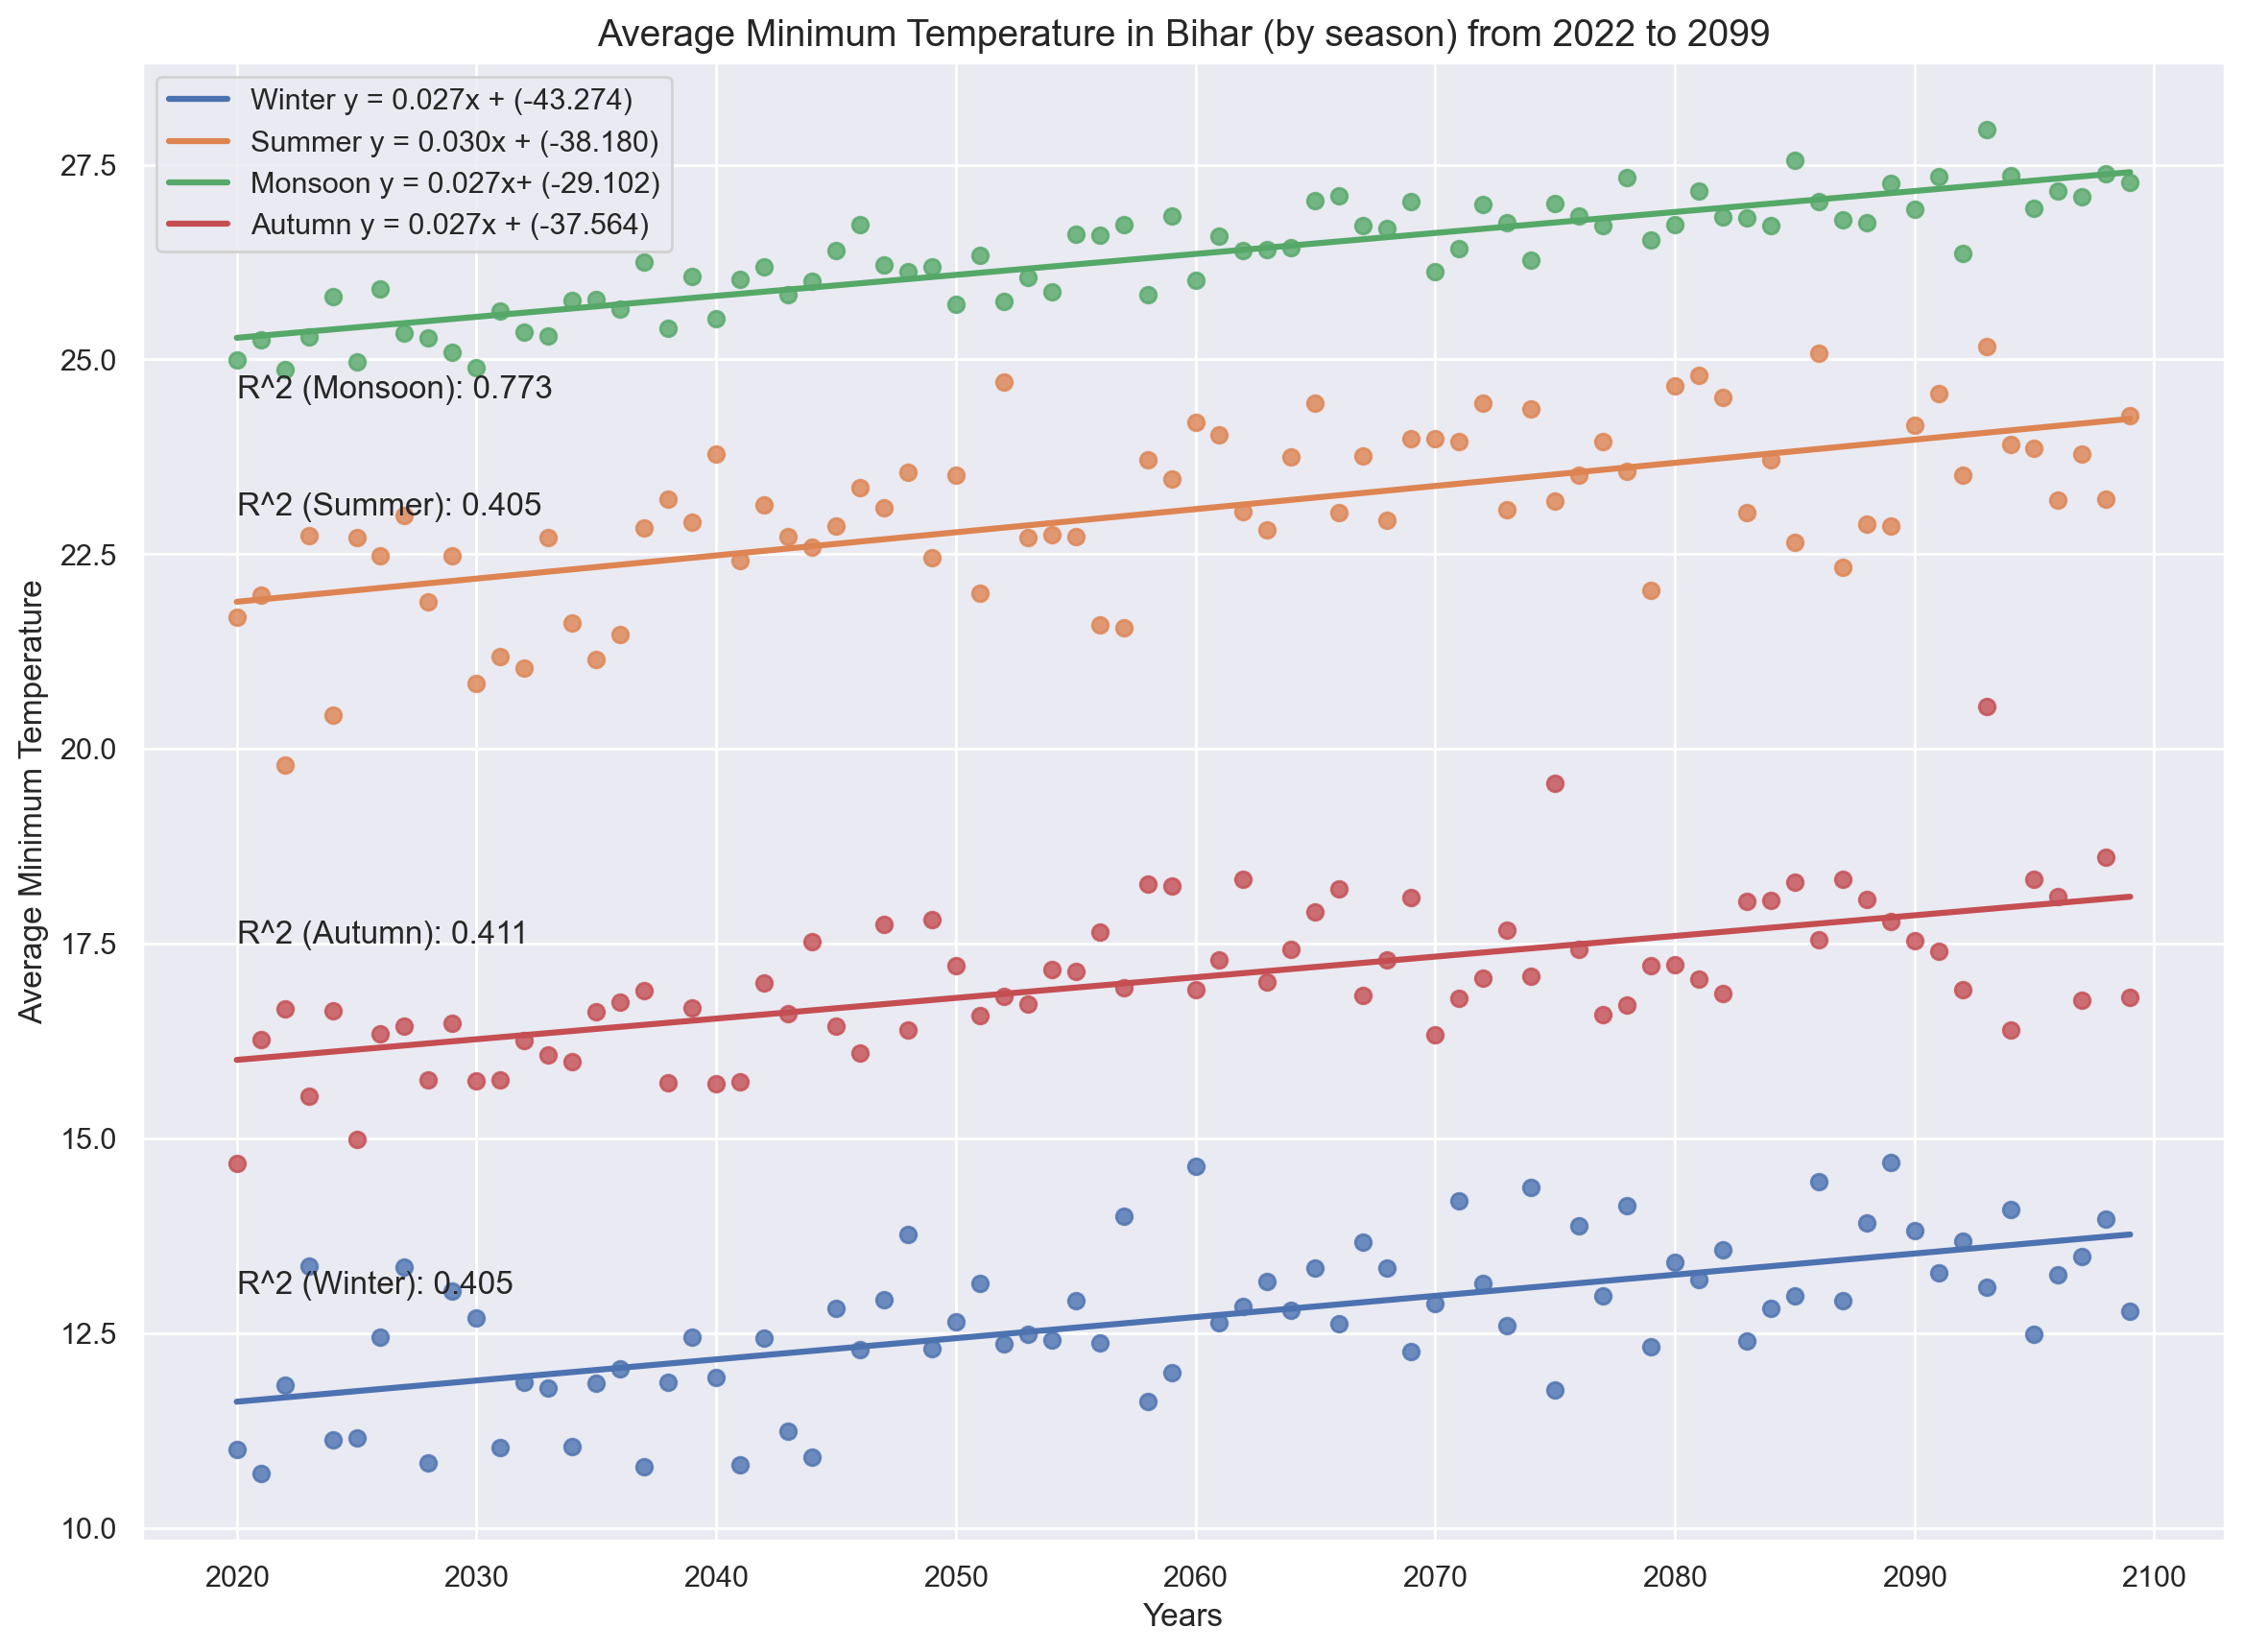

<Figure size 1400x1000 with 0 Axes>

In [165]:
# regression lines
slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_mins['Years'],seasonal_mins['Winter'])
ax = sb.regplot(x="Years", y="Winter", ci=None, data = seasonal_mins, line_kws={'label':"Winter y = {0:.3f}x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Winter): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 13))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_mins['Years'],seasonal_mins['Summer'])
ax = sb.regplot(x="Years", y="Summer", ci=None, data = seasonal_mins, line_kws={'label':"Summer y = {0:.3f}x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Summer): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 23))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_mins['Years'],seasonal_mins['Monsoon'])
ax = sb.regplot(x="Years", y="Monsoon", ci=None, data = seasonal_mins, line_kws={'label':"Monsoon y = {0:.3f}x+ ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Monsoon): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 24.5))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_mins['Years'],seasonal_mins['Autumn'])
ax = sb.regplot(x="Years", y="Autumn", ci=None, data = seasonal_mins, line_kws={'label':"Autumn y = {0:.3f}x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Autumn): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 17.5))

# plot legend
ax.legend()

# axes labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Minimum Temperature', fontsize=12)
plt.title("Average Minimum Temperature in Bihar (by season) from 2022 to 2099", fontsize=14)

# figure size
sb.set(rc={"figure.figsize":(14, 10)})

# save plot
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/revatishelat/Documents/DownIES/Visualization/Seasonal/Average Minimum Temperature in Bihar (by seasons) 2020-2099.")

In [166]:
# add years column
seasonal_maxs.insert(4, 'Years', years)
seasonal_maxs

,Winter,Summer,Monsoon,Autumn,Years
2020,24.605232,33.088999,24.991106,26.129293,2020
2021,24.593704,33.777252,25.253942,26.501429,2021
2022,22.663759,30.843107,24.873562,28.249301,2022
2023,26.420399,33.780548,25.294209,27.275363,2023
2024,25.347492,32.235733,25.811539,28.629257,2024
...,...,...,...,...,...
2095,26.293879,37.037771,26.939577,28.403834,2095
2096,26.032074,35.923843,27.163666,30.468386,2096
2097,25.630241,35.821426,27.086994,28.322739,2097
2098,27.310863,35.010056,27.388338,30.021294,2098


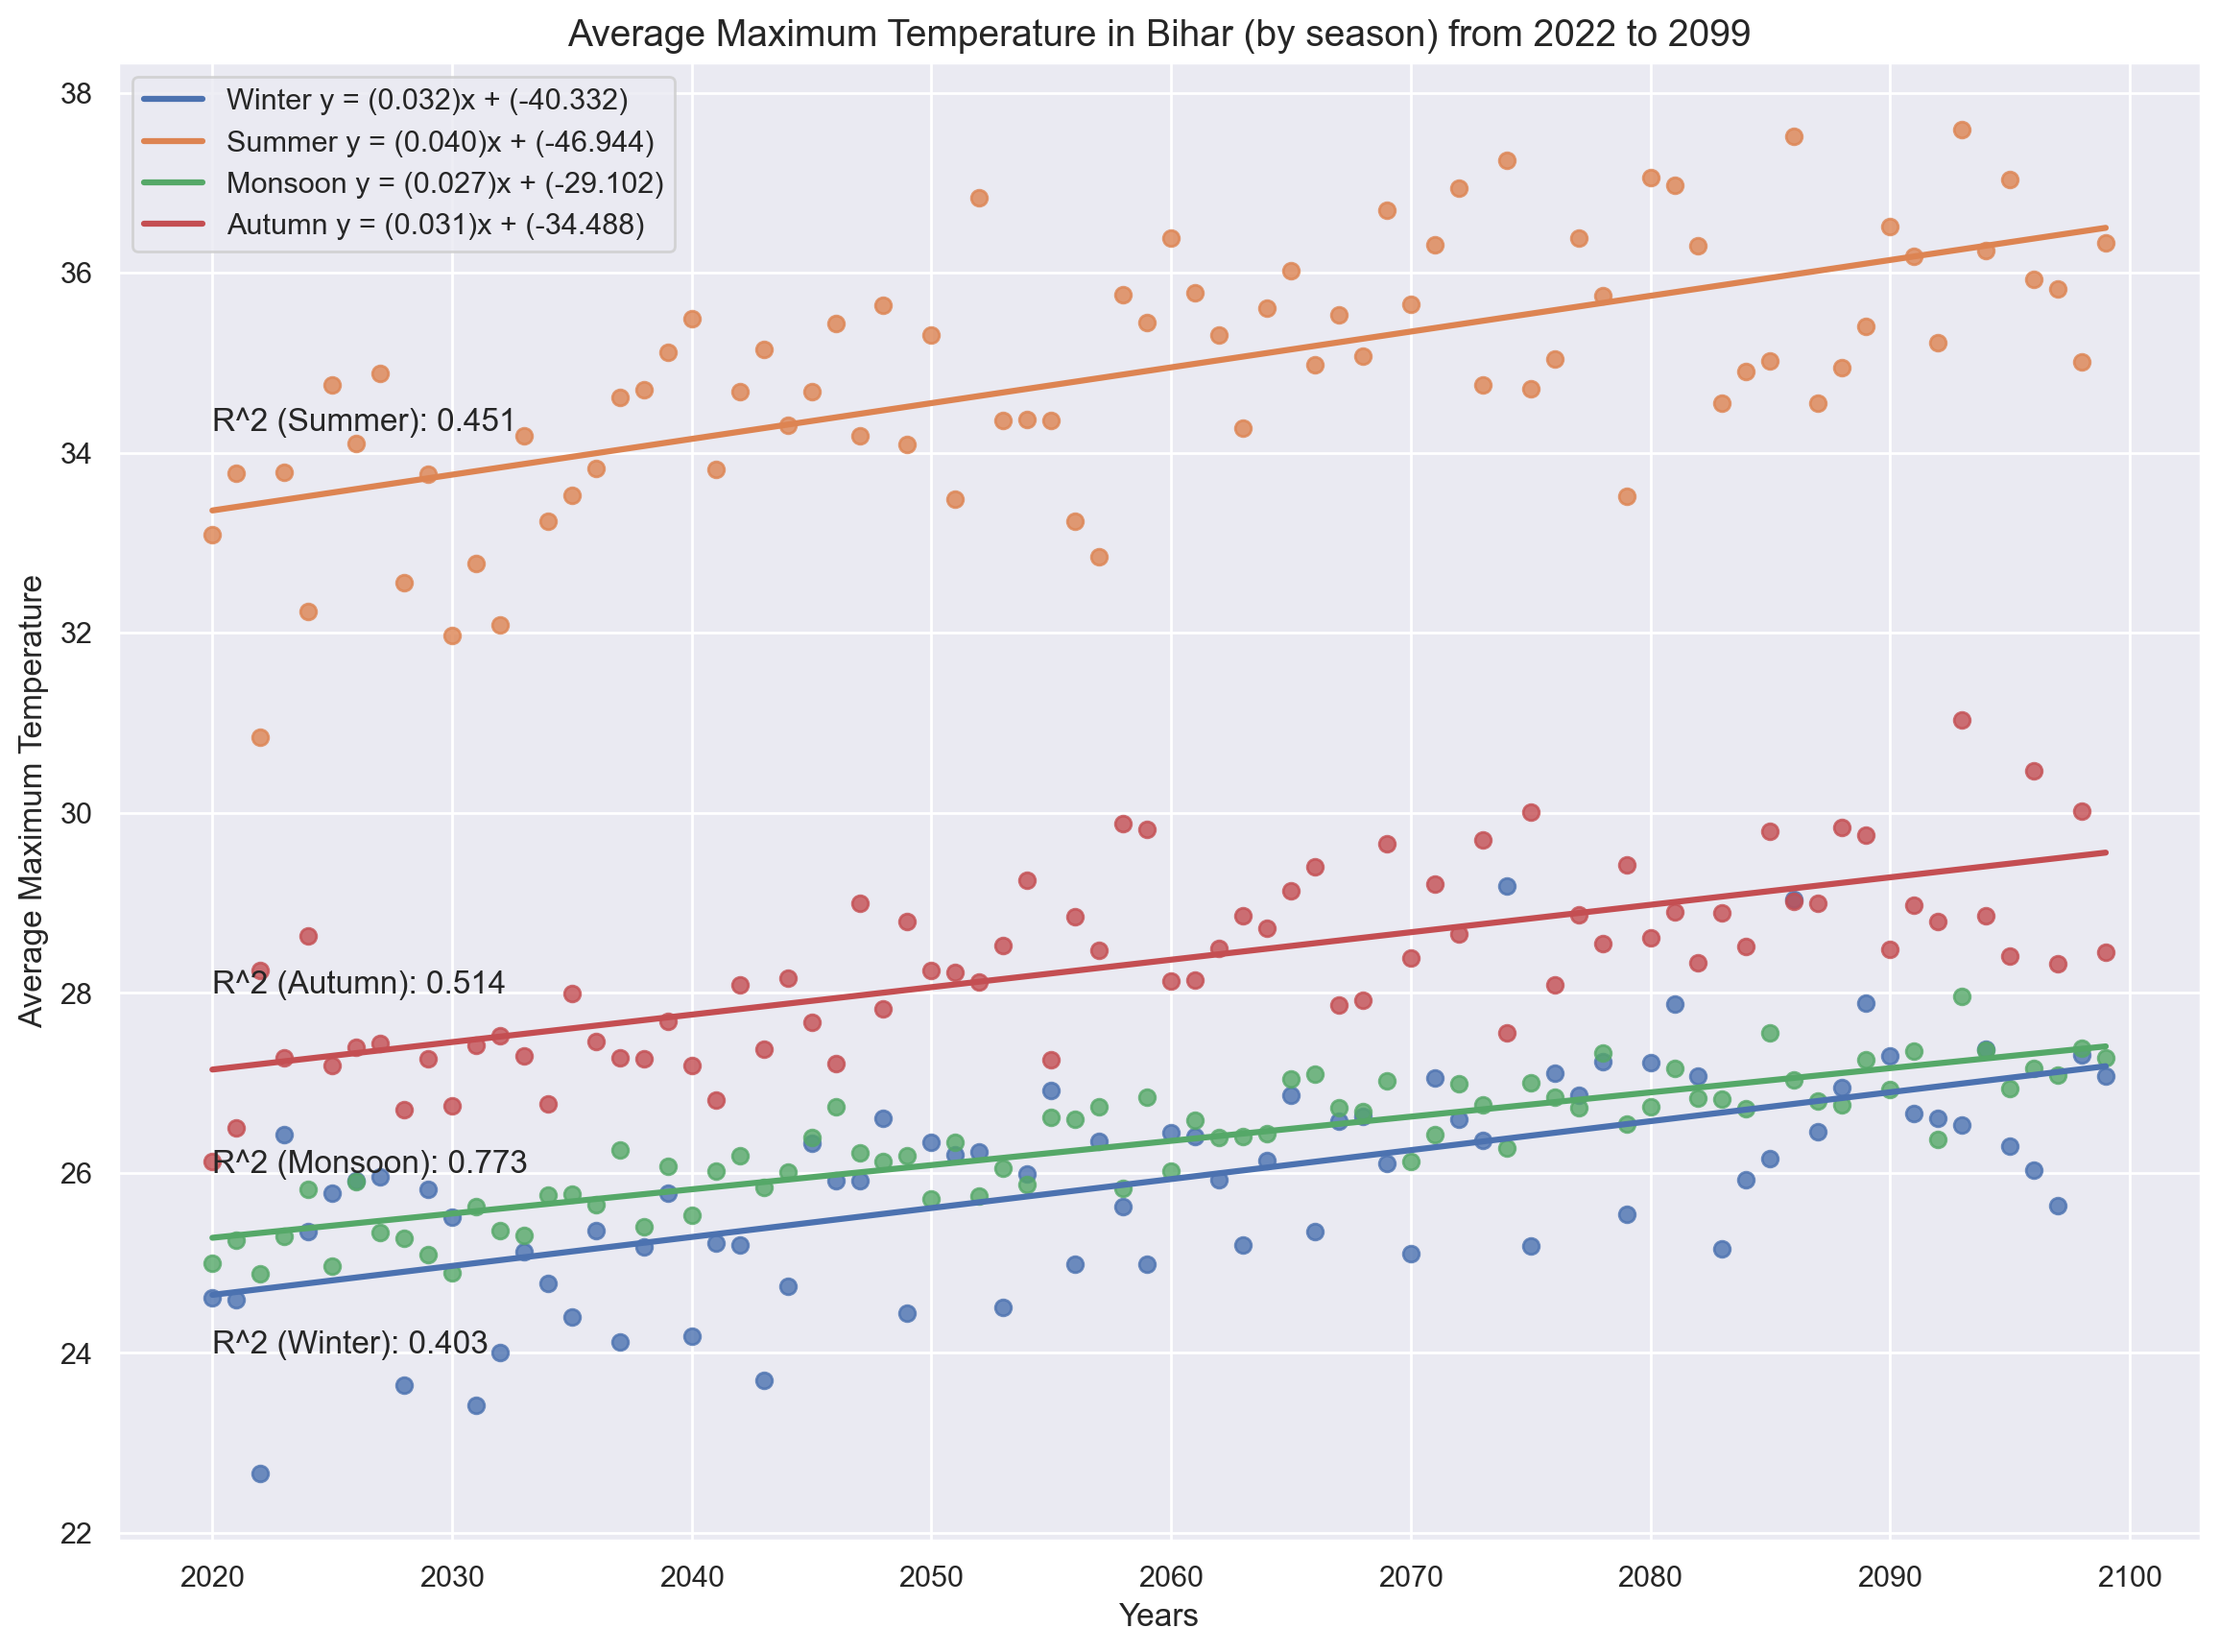

<Figure size 1400x1000 with 0 Axes>

In [167]:
# regression lines
slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_maxs['Years'],seasonal_maxs['Winter'])
ax = sb.regplot(x="Years", y="Winter", ci=None, data = seasonal_maxs, line_kws={'label':"Winter y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Winter): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 24))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_maxs['Years'],seasonal_maxs['Summer'])
ax = sb.regplot(x="Years", y="Summer", ci=None, data = seasonal_maxs, line_kws={'label':"Summer y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Summer): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 34.25))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_maxs['Years'],seasonal_maxs['Monsoon'])
ax = sb.regplot(x="Years", y="Monsoon", ci=None, data = seasonal_maxs, line_kws={'label':"Monsoon y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Monsoon): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 26))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_maxs['Years'],seasonal_maxs['Autumn'])
ax = sb.regplot(x="Years", y="Autumn", ci=None, data = seasonal_maxs, line_kws={'label':"Autumn y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Autumn): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 28))

# plot legend
ax.legend()

# axes labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Maximum Temperature', fontsize=12)
plt.title("Average Maximum Temperature in Bihar (by season) from 2022 to 2099", fontsize=14)

# figure size
sb.set(rc={"figure.figsize":(14, 10)})

# save plot
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/revatishelat/Documents/DownIES/Visualization/Seasonal/Average Maximum Temperature in Bihar (by seasons) 2020-2099.")

In [168]:
# add years column
seasonal_prs.insert(4, 'Years', years)
seasonal_prs

,Winter,Summer,Monsoon,Autumn,Years
2020,21.553593,53.041799,228.788223,28.022293,2020
2021,10.061460,43.566488,276.460876,99.120758,2021
2022,168.753540,102.332153,242.761383,18.239826,2022
2023,15.334203,51.080566,305.024750,12.461854,2023
2024,7.428442,70.558980,142.106033,22.917185,2024
...,...,...,...,...,...
2095,16.144741,25.265406,294.066376,98.606496,2095
2096,33.807556,20.869779,157.034729,32.811440,2096
2097,139.722885,30.461866,287.408844,55.659037,2097
2098,34.430908,70.316518,199.193481,41.477854,2098


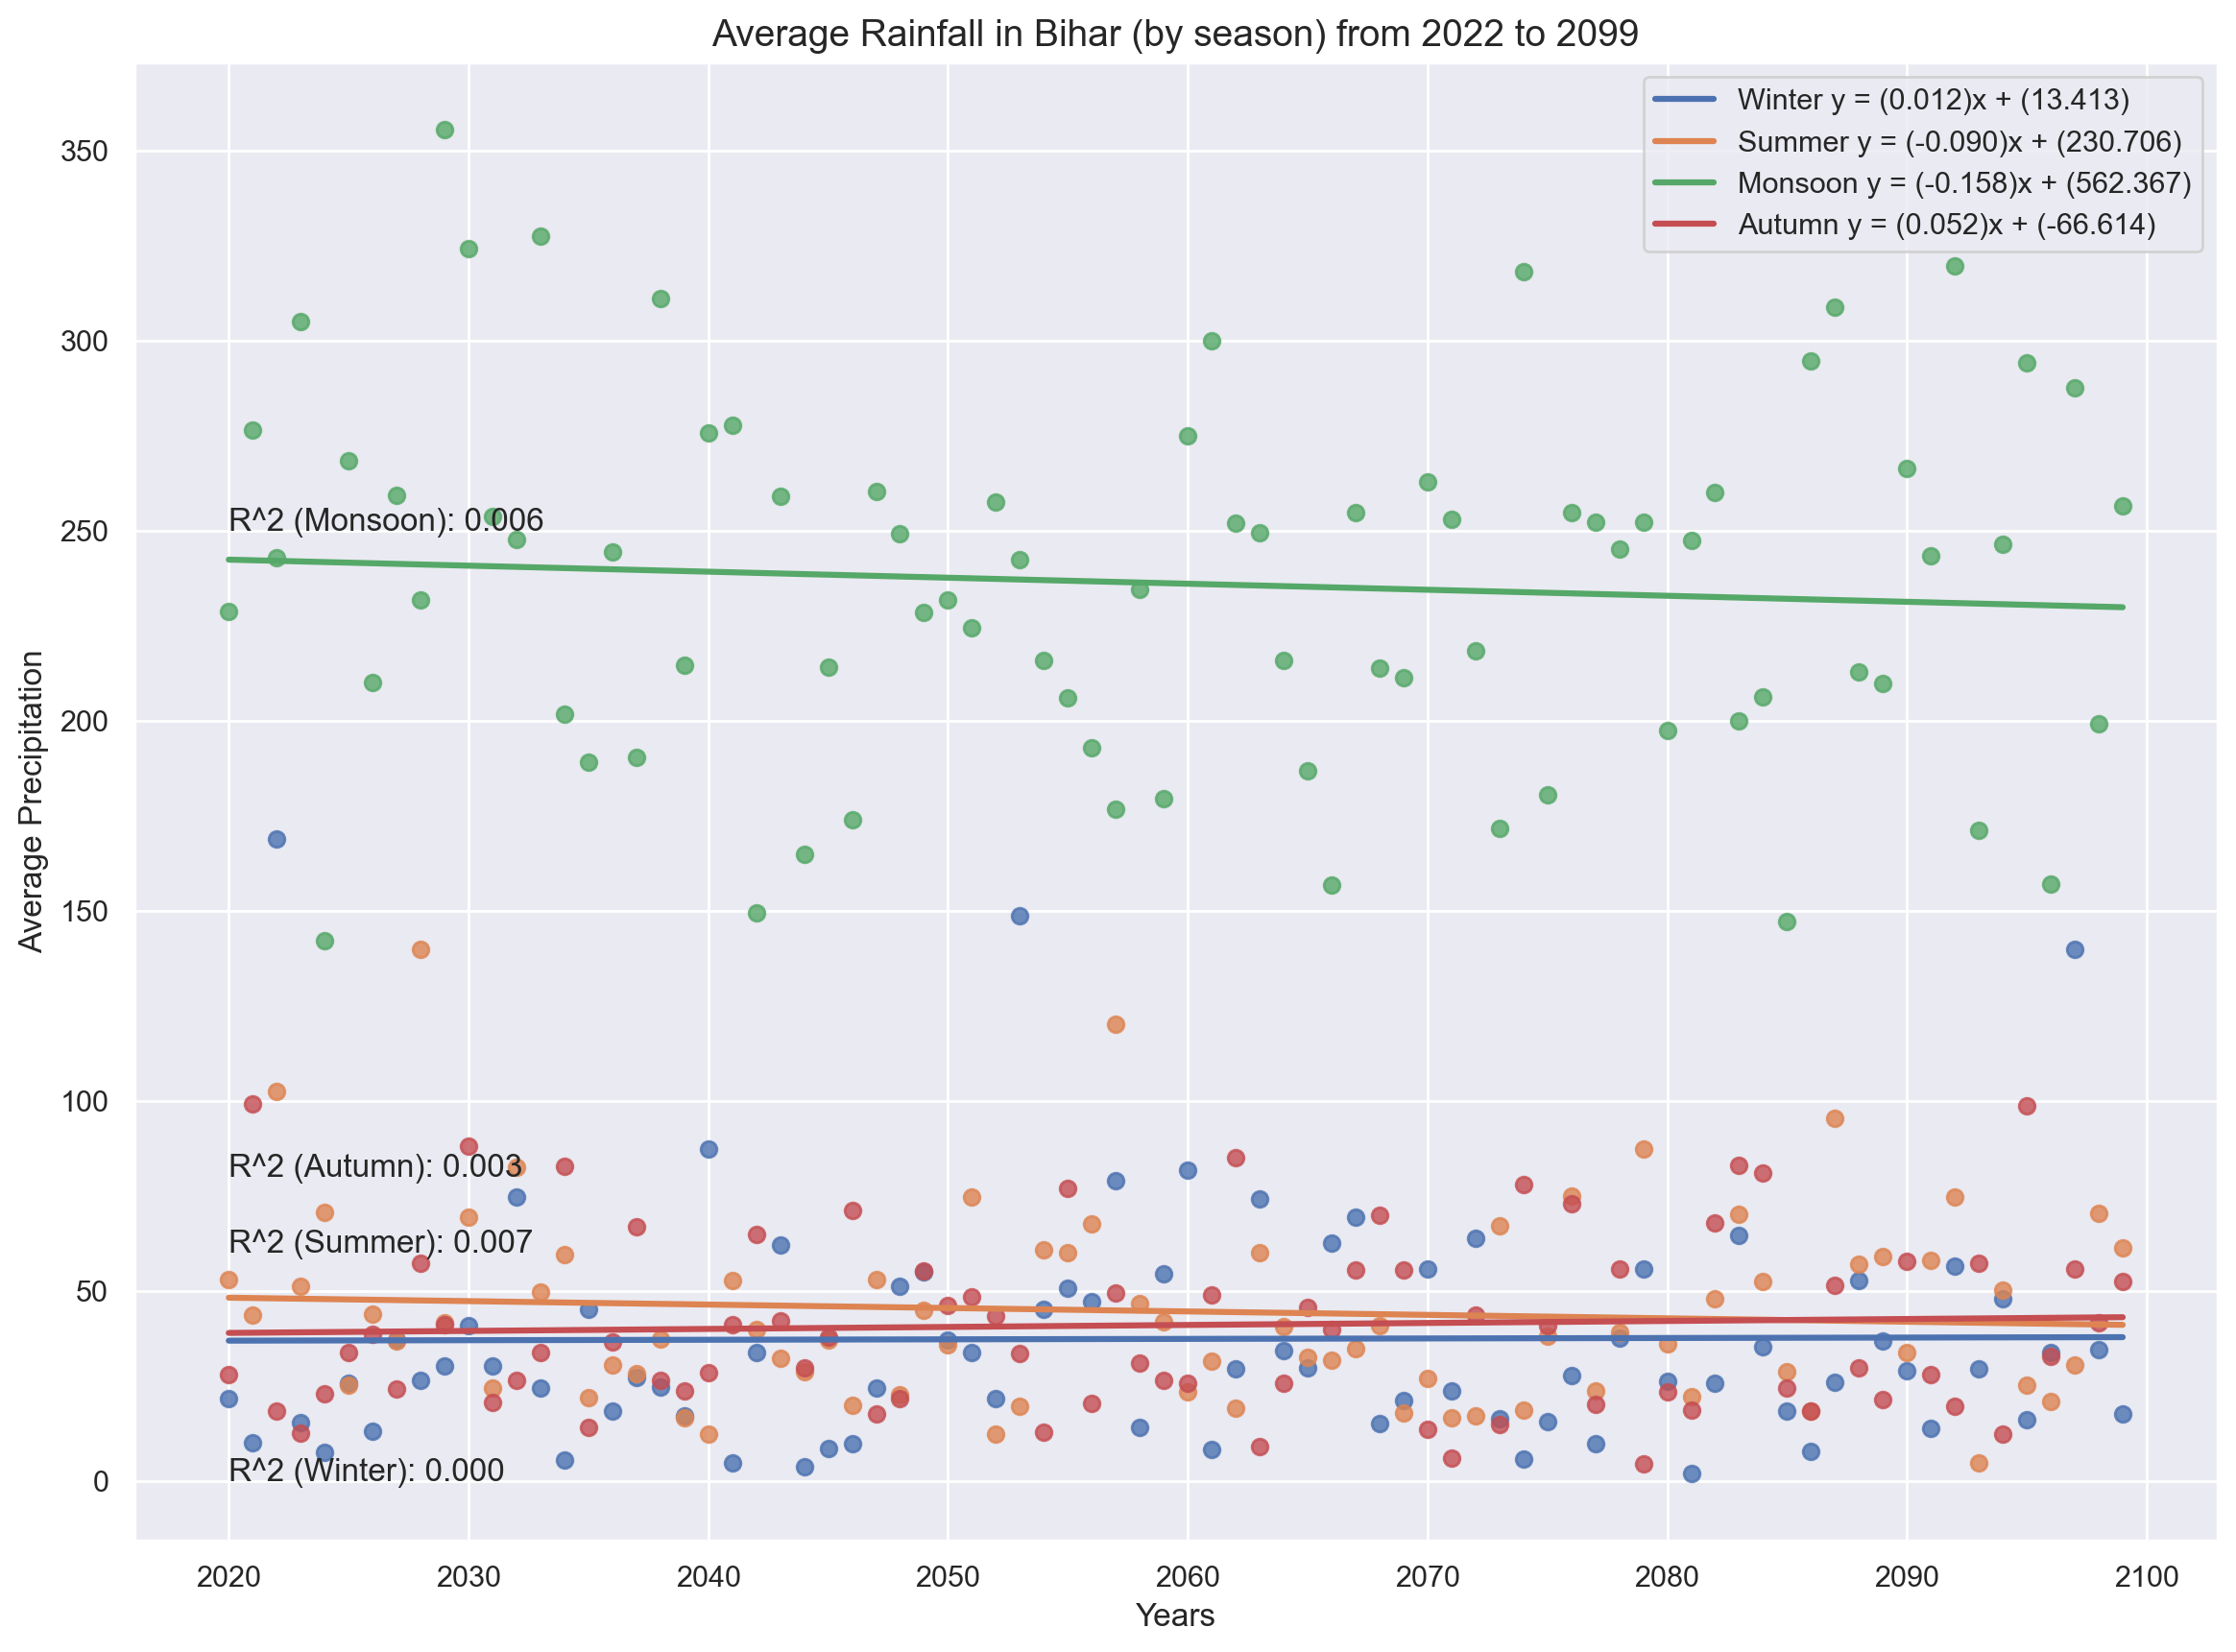

<Figure size 1400x1000 with 0 Axes>

In [169]:
# regression lines
slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_prs['Years'],seasonal_prs['Winter'])
ax = sb.regplot(x="Years", y="Winter", ci=None, data = seasonal_prs, line_kws={'label':"Winter y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Winter): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 0))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_prs['Years'],seasonal_prs['Summer'])
ax = sb.regplot(x="Years", y="Summer", ci=None, data = seasonal_prs, line_kws={'label':"Summer y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Summer): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 60))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_prs['Years'],seasonal_prs['Monsoon'])
ax = sb.regplot(x="Years", y="Monsoon", ci=None, data = seasonal_prs, line_kws={'label':"Monsoon y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Monsoon): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 250))

slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_prs['Years'],seasonal_prs['Autumn'])
ax = sb.regplot(x="Years", y="Autumn", ci=None, data = seasonal_prs, line_kws={'label':"Autumn y = ({0:.3f})x + ({1:.3f})".format(slope,intercept)})
ax.annotate('R^2 (Autumn): ' + str("{:.3f}".format(r_value**2)), xy=(2020, 80))

# plot legend
ax.legend()

# axes labels
plt.xlabel('Years', fontsize=12)
plt.ylabel('Average Precipitation', fontsize=12)
plt.title("Average Rainfall in Bihar (by season) from 2022 to 2099", fontsize=14)

# figure size
sb.set(rc={"figure.figsize":(14, 10)})

# save plot
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("/Users/revatishelat/Documents/DownIES/Visualization/Seasonal/Average Precipitation in Bihar (by seasons) 2020-2099.")